In [185]:
%load_ext autoreload
%autoreload 2
import UNIS_src as src
import numpy as np 
from pathlib import Path
import os 
import pandas as pd 
import matplotlib.pyplot as plt
from dataclasses import dataclass
import glob
from scipy.interpolate import interp1d,interp2d
import matplotlib.ticker as tick
import chaosmagpy as cp
from parula import parula_map
# %reset_selective str # How to reset varibles... 
N = 5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data load

In [84]:
folder_path = Path("..", "Data", "Magnetic_data", "Fraan_Bosse")
txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
# print(txt_files)
names =  ["lat", "lon", "elevation", "nT" ,"sq", "cor_nT", "sat", 
          "position_type", "time", "picket_x", "picket_y"]
dat1 = pd.read_csv(txt_files[0], delimiter="\s+", header = 0, skiprows=14, names = names)
dat2 = pd.read_csv(txt_files[1], delimiter="\s+", header = 0, skiprows=0, 
                   names = ["lat", "lon", "elevation", "nT",	"sq", "time", "Height", 
                            "unknown"])
dat3 = pd.read_csv(txt_files[2], delimiter="\s+", header = 0, skiprows=0, names = names)
dat4 = pd.read_csv(txt_files[3], delimiter="\s+", header = 0, skiprows=0, 
                   names = ["lat", "lon", "elevation", "nT",	"sq", "time"])
dat5 = pd.read_csv(txt_files[4], delimiter="\s+", header = 0, skiprows=14, names = names)
dat6 = pd.read_csv(txt_files[5], delimiter="\s+", header = 0, skiprows=0, names = names)
dat7 = pd.read_csv(txt_files[6], delimiter="\s+", header = 0, skiprows=0, names = names)
dat8 = pd.read_csv(txt_files[7], delimiter="\s+", header = 0, skiprows=0, names = names)

# Conversion to UTM 33 
df_list = [dat1, dat2, dat3, dat4, dat5, dat6, dat7, dat8]
utmZone = "33"

for i, df in enumerate(df_list): 
    UTM = src.ll2utm(df['lon'], df['lat'], df['elevation'], utmZone)
    df["Northing"] = UTM.Northing
    df["Easting"] = UTM.Easting
    df["UTM_elevation"] = UTM.Elevation

# Print datafiles location and names
txt_files


['..\\Data\\Magnetic_data\\Fraan_Bosse\\1_Helvetesdalen_over_diabas.txt',
 '..\\Data\\Magnetic_data\\Fraan_Bosse\\1_Helvetesdalen_over_diabastopo.txt',
 '..\\Data\\Magnetic_data\\Fraan_Bosse\\2_Helvetesdalen_parallell_dike.txt',
 '..\\Data\\Magnetic_data\\Fraan_Bosse\\3_Helvetesdalen_crossing_dike.txt',
 '..\\Data\\Magnetic_data\\Fraan_Bosse\\3_Helvetesdalen_crossing_dike_detailed.txt',
 '..\\Data\\Magnetic_data\\Fraan_Bosse\\4_Helvetesdalen_second_area.txt',
 '..\\Data\\Magnetic_data\\Fraan_Bosse\\5_Helvetesdalen_third_area.txt',
 '..\\Data\\Magnetic_data\\Fraan_Bosse\\6_Helvetesdalen_line_and_sixth_area_dolerite.txt',
 '..\\Data\\Magnetic_data\\Fraan_Bosse\\Basestation_Longyearbyen.txt']

In [85]:
# Plot of raw data 
# file5 = Path("..", "Data", "Svalbard_coastline.txt")
# coast = pd.read_csv(file5, delimiter="\s+", header=0, skiprows=0, names=["Longitude", "Latitude"])

# UTM_corr = src.ll2utm(coast.Longitude, coast.Latitude, np.zeros(len(coast.Latitude)), "33")
# N = 3
# fig = plt.figure(figsize=(5, 5))
# plt.plot(UTM_corr.Easting, UTM_corr.Northing, linewidth=.5,color="black")

# for i, df in enumerate(df_list): 
#     plt.scatter(df["Easting"], df["Northing"], 10, df["nT"])
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")
# plt.ylabel(r"Northing [m]")
# plt.xlabel(r"Easting [m]")
# plt.title(r"All land survey lines, Total Field Measurement [nT]")
# plt.xlim(5.2e5, 5.4e5)
# plt.ylim(8.68e6, 8.7e6)
# # plt.clim(-100, 0)
# plt.xticks(rotation = 45)
# plt.grid()
# plt.show()

Text(0.5, 0, 'Survey Lines')

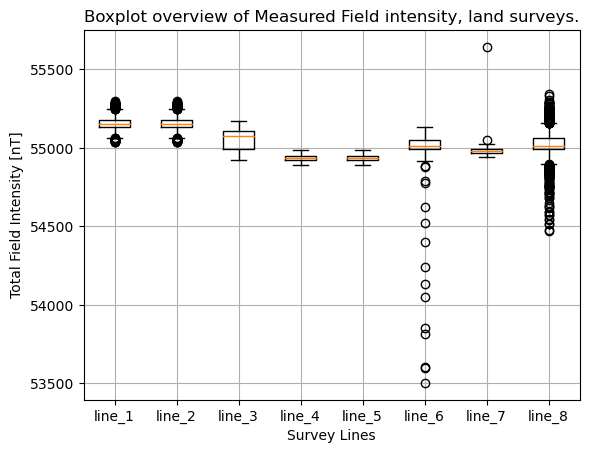

In [86]:
temp = {"line_1": dat1.nT, "line_2":dat2.nT, "line_3":dat3.nT, 
        "line_4":dat4.nT, "line_5":dat5.nT, "line_6":dat6.nT, 
        "line_7":dat7.nT, "line_8":dat8.nT}

fig, ax = plt.subplots()
ax.boxplot(temp.values())
ax.set_xticklabels(temp.keys())
plt.grid()
plt.title("Boxplot overview of Measured Field intensity, land surveys.")
plt.ylabel("Total Field Intensity [nT]")
plt.xlabel("Survey Lines")

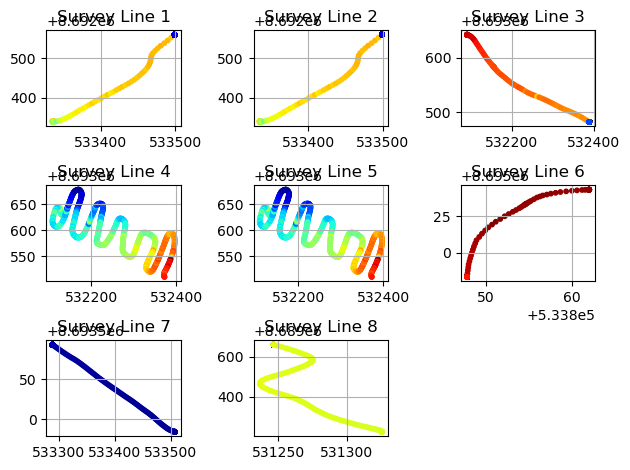

In [87]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 3)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over dataframes and plot in each subplot, skipping the bottom left subplot
for i, (df, ax) in enumerate(zip(df_list, axs)):
    ax.scatter(df["Easting"], df["Northing"], 10, df["nT"])
    ax.set_title(f"Survey Line {i+1}")
    ax.grid()
    # ax.set_xticklabels(df["time"], rotation=20)

# Remove the bottom left subplot
fig.delaxes(axs[-1])

# Adjust the layout and spacing
plt.tight_layout()

# Show the figure
plt.show()

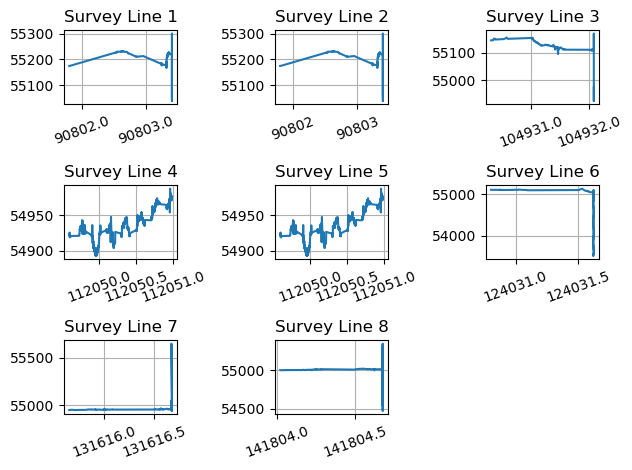

In [88]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 3)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Iterate over dataframes and plot in each subplot, skipping the bottom left subplot
for i, (df, ax) in enumerate(zip(df_list, axs)):
    ax.plot(df["time"], df["nT"])
    ax.set_title(f"Survey Line {i+1}")
    ax.grid()
    ax.set_xticklabels(df["time"], rotation=20)

# Remove the bottom left subplot
fig.delaxes(axs[-1])

# Adjust the layout and spacing
plt.tight_layout()

# Show the figure
plt.show()

## Line 4 & 5 (Helvetesdalen Crossing Dyke)

In [89]:
# lines_extent = ["A", "A'", "B", "B'", "C", "C'", "D", "D'", "E", "E'", 
#                 "F", "F'", "G", "G'", "H", "H'", "J", "J'", "K", "K'"]
data = {
    'ID': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Lowerlim': [127, 207, 296, 365, 434, 505, 556, 628, 680, 775],
    'Upperlim': [186, 270, 348, 420, 484, 540, 599, 668, 745, 815],
    'Start': ["A", "B", "C", "D", "E", "F", "G", "H", "J", "K"], 
    'End': ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "J'", "K'"]
}
limits = pd.DataFrame(data)


In [90]:
# lowerlim = 505
# upperlim = 540
# fig = plt.figure(figsize=(2*N, 2*N))
# # plt.plot(UTM_corr.Easting, UTM_corr.Northing, linewidth=.5,color="black")

# plt.scatter(dat4.Easting[lowerlim:upperlim], dat4.Northing[lowerlim:upperlim], 10, dat4.nT[lowerlim:upperlim], zorder = 10)
# plt.plot(dat4.Easting, dat4.Northing)
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")
# plt.ylabel(r"Northing [m]")
# plt.xlabel(r"Easting [m]")
# plt.title(r"Line survey 4-5, Total Field Measurement [nT]", pad=20, fontdict={'fontsize': 14})
# plt.xticks(rotation = 45)

# plt.grid()
# plt.show()

In [91]:
def find_intersection(p1, p2):
    # p1 and p2 are the polynomial functions of the two lines
    return np.roots(p1 - p2)

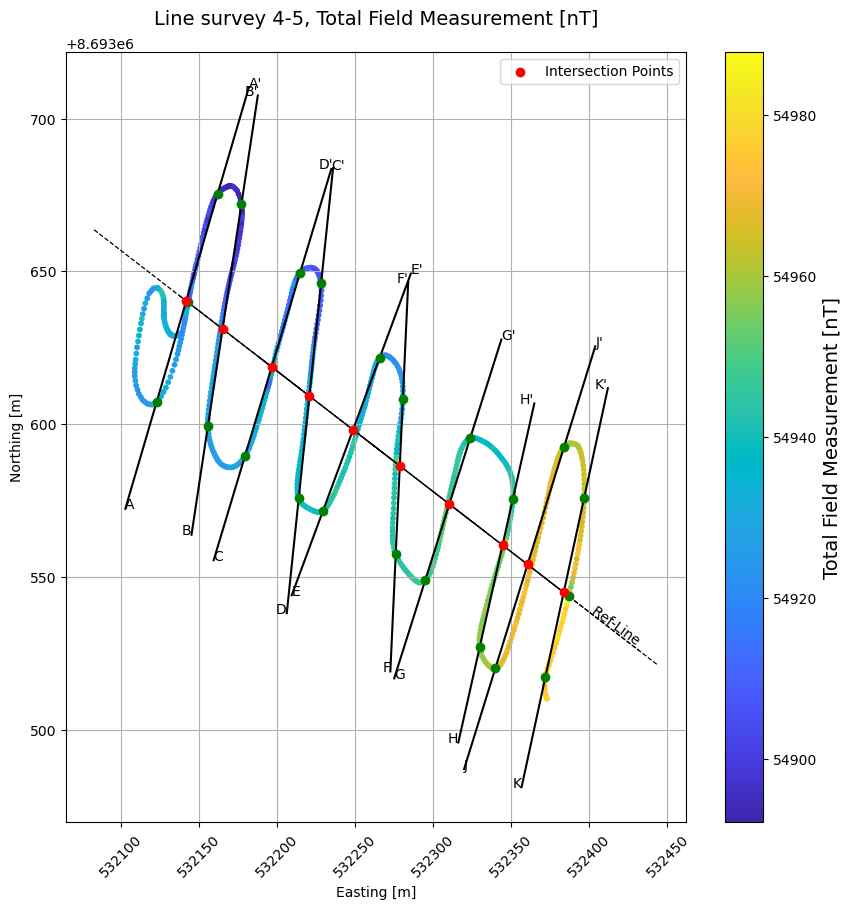

In [92]:

fig = plt.figure(figsize=(2*N, 2*N))
Overshoot = np.array([20, 32, 20, 22, 20, 8, 20, 35, 20, 40])

# Determine Reference line 
x1 = 152
x2 = 796
m1 = [dat4.Easting[x1], dat4.Easting[x2]]
m2 = [dat4.Northing[x1], dat4.Northing[x2]]
coefficients_ = np.polyfit(m1, m2, 1)

# Let's compute the values of the line...
polynomial_ = np.poly1d(coefficients_)
x_axis_ = np.linspace(dat4.Easting[limits.Lowerlim]-40,dat4.Easting[limits.Upperlim]+60,100)
y_axis_ = polynomial_(x_axis_)

intersection_points = []

for i in range(limits.shape[0]):
    # Define the known points
    x = [dat4.Easting[limits.Lowerlim[i]], dat4.Easting[limits.Upperlim[i]]]
    y = [dat4.Northing[limits.Lowerlim[i]], dat4.Northing[limits.Upperlim[i]]]

    # Calculate the coefficients. This line answers the initial question. 
    coefficients = np.polyfit(x, y, 1)

    # Let's compute the values of the line...
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(dat4.Easting[limits.Lowerlim[i]]-Overshoot[i],dat4.Easting[limits.Upperlim[i]]+Overshoot[i],100)
    y_axis = polynomial(x_axis)

    # ...and plot the points and the line
    plt.plot(x_axis, y_axis, color="black")
    plt.plot( x[0], y[0], 'go' )
    plt.plot( x[1], y[1], 'go' )

    # Determine intersection 
    x_inter = find_intersection(polynomial_, polynomial)
    y_inter = polynomial_(x_inter)

    intersection_points.append((x_inter, y_inter))

    if i % 2 == 0:
        plt.text(x_axis[0], y_axis[0], limits.Start[i], ha="left")
        plt.text(x_axis[-1], y_axis[-1], limits.End[i], ha="left")
    else:
        plt.text(x_axis[0], y_axis[0], limits.Start[i], ha="right")
        plt.text(x_axis[-1], y_axis[-1], limits.End[i], ha="right")  
# sc = ax2.scatter(data.lon,data.lat,c=data.nT,facecolors="None",cmap=parula_map, alpha=.05)

sc = plt.scatter(dat4.Easting, dat4.Northing, 10, c=dat4.nT,facecolors="None",cmap=parula_map)
cbar=fig.colorbar(sc)
plt.grid()
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")
cbar.set_label('Total Field Measurement [nT]',fontsize=14)
cbar.set_alpha(1)
cbar.draw_all()

plt.title(r"Line survey 4-5, Total Field Measurement [nT]", pad=20, fontdict={'fontsize': 14})
plt.xticks(rotation = 45)

# ...and plot the points and the line
plt.plot(x_axis_, y_axis_, color="black", linewidth=.9, linestyle="--")
plt.text(x_axis_[-1][-3], y_axis_[-1][-3], "     Ref-Line", rotation = -36, rotation_mode = 'anchor')
plt.plot(dat4.Easting[x1], dat4.Northing[x1], "go")
plt.plot(dat4.Easting[x2], dat4.Northing[x2], "go")

# Extract x and y coordinates from the intersection points
x_coords = [point[0][0] for point in intersection_points]
y_coords = [point[1][0] for point in intersection_points]

# Plot the intersection points
plt.scatter(x_coords, y_coords, color='red', label='Intersection Points', zorder = 10)
plt.legend()

plt.show()


In [93]:
def create_df(lowerlim, upperlim): 
    frame = {"Easting":dat4.Easting[lowerlim:upperlim], "Northing":dat4.Northing[lowerlim:upperlim], 
             "nT":dat4.nT[lowerlim:upperlim], "time":dat4.time[lowerlim:upperlim], 
             "elevation":dat4.UTM_elevation[lowerlim:upperlim]}

    df = pd.DataFrame(frame)
    return df

def dist_from_ref(easting_mes, easting_ref, northing_mes, northing_ref): 
    dist = np.sqrt((easting_ref - easting_mes)**2 + (northing_ref - northing_mes)**2)
    return dist

def dist_from_0(easting_mes, easting_ref, northing_mes, northing_ref): 
    dist = np.sqrt((easting_ref - easting_mes)**2 + (northing_ref - northing_mes)**2)

    if np.mean(np.diff(northing_mes)) < 0: 
        idx = (northing_mes > northing_ref)
        dist[idx] = dist * (-1)
    else: 
        idx = (northing_mes < northing_ref)
        dist[idx] = dist * (-1)
    return dist

In [94]:

# dist = dist_from_0(Lines["Line_B"].Easting, x_coords[1], Lines["Line_B"].Northing, y_coords[1])


In [95]:
# How to: Lines["Line_A"].Easting

Lines = {}  # Dictionary to store the dataframes

# Iterate over the range of indices
for i in range(len(limits.ID)):  # Assuming you want to create 3 dataframes (Line_A, Line_B, Line_C)
    # Create dataframe using create_df() function with corresponding indices
    line_name = "Line_" + chr(ord('A') + i)  # Convert index to corresponding letter
    Lines[line_name] = create_df(limits.Lowerlim[i], limits.Upperlim[i])
    # Lines[line_name]["Dist_to_ref"] = dist_from_ref(Lines[line_name].Easting, 
    #                                                 x_coords[i], Lines[line_name].Northing, y_coords[i])
    Lines[line_name]["Dist_to_ref"] = dist_from_0(Lines[line_name].Easting, 
                                                    x_coords[i], Lines[line_name].Northing, y_coords[i])

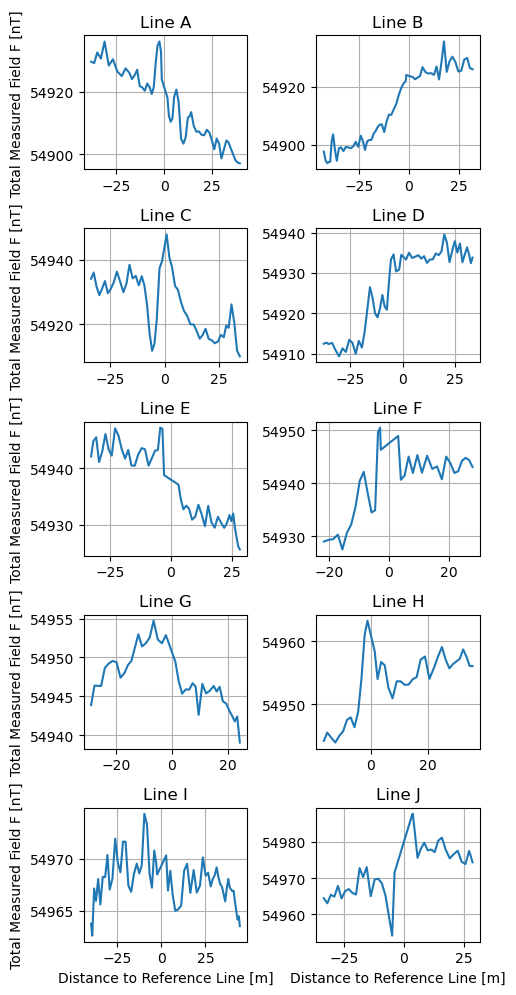

In [96]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(5, 10))

# Define the lines
lines = ["Line_A", "Line_B", "Line_C", "Line_D", "Line_E", "Line_F", "Line_G", "Line_H", "Line_I", "Line_J"]

# Iterate over the lines and plot them in subplots
for i, line in enumerate(lines):
    # Determine the subplot indices
    row = i // 2
    col = i % 2

    # Select the subplot
    ax = axes[row, col]

    # Flip the data for specific lines
    # if line in ["Line_B", "Line_D", "Line_F", "Line_H", "Line_J"]:
    #     flipped_nT = np.flip(Lines[line].nT)
    #     flipped_Dist_to_ref = np.flip(Lines[line].Dist_to_ref)
    #     # flipped_Dist_to_ref = Lines[line].Dist_to_ref
    # else:
    #     flipped_nT = Lines[line].nT
    #     flipped_Dist_to_ref = Lines[line].Dist_to_ref
    
    flipped_nT = Lines[line].nT
    flipped_Dist_to_ref = Lines[line].Dist_to_ref

    ax.plot(flipped_Dist_to_ref, flipped_nT)
    ax.set_title(lines[i].split("_")[0] + " " + lines[i].split("_")[1] )
    # ax.set_xlabel("Distance to Reference Line [m]")
    # ax.set_ylabel("Measured Total Field [nT]")

    if col == 0:
        ax.set_ylabel("Total Measured Field F [nT]")

    # Show x-axis label only on the bottom plots
    if row == 4:
        ax.set_xlabel("Distance to Reference Line [m]")


    # Add gridlines
    ax.grid()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Basestation - Longyearbyen 


In [97]:
# basestation_path = Path("..", "Data", "Magnetic_data", "Fraan_Bosse", "Basestation_Longyearbyen.txt")
basestation_path = Path("..", "Data", "BS_LYER", "BS_LYER_01052022.txt")
BS = pd.read_csv(basestation_path, delimiter="\s+", header=0, skiprows=6, 
                 names=["date", "time", "Dec", "Horiz", "Vert", "Incl", "Total"])
BS = BS[BS.Total != max(BS.Total)]
BS.reset_index(drop=True, inplace=True)
BS["centered"] = BS.Total - np.mean(BS.Total)

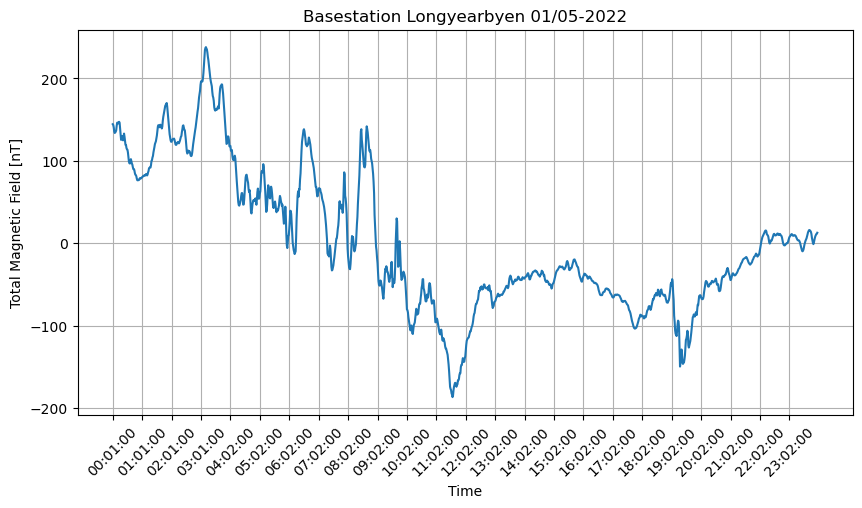

In [98]:
fig = plt.figure(figsize=(2*N, N))
plt.plot(BS.time, BS.centered)
plt.grid()
plt.xlabel("Time")
plt.ylabel("Total Magnetic Field [nT]")
plt.title(r"Basestation Longyearbyen 01/05-2022")
xticks_indices = range(0, len(BS.Total), 60)
xticks_labels = [list(BS.time)[i] for i in xticks_indices]
plt.xticks(xticks_indices)
# plt.set_xticklabels(xticks_labels, rotation=45)
plt.gca().set_xticklabels(xticks_labels, rotation=45)

plt.show()


In [99]:
from datetime import datetime

time_series = dat4.time

# Define the date
date_str = '01/05/2022'
date_format = '%d/%m/%Y'
date = datetime.strptime(date_str, date_format).date()

# Convert time series to formatted time strings
formatted_times = []
for time_value in time_series:
    time_str = str(int(time_value)).zfill(6)  # Convert to 6-digit string format
    hours = int(time_str[:2])
    minutes = int(time_str[2:4])
    seconds = int(time_str[4:6])
    microseconds = int((time_value % 1) * 1e6)  # Extract microseconds
    datetime_obj = datetime.combine(date, datetime.min.time())  # Create datetime object with date and midnight time
    datetime_obj = datetime_obj.replace(hour=hours, minute=minutes, second=seconds, microsecond=microseconds)
    formatted_time = datetime_obj.time().strftime('%H:%M:%S.%f')
    formatted_times.append(formatted_time)

dat4["formatted_time"] = formatted_times

In [100]:
#Date: 24/08-2018 
# BS["SOD"] = np.ones(len(BS.time))

def get_sec(time): 
    """
    hh:mm:ss.s => SOD (Seconds Of Day)
    """
    SOD = []
    for i in range(len(time)): 
        SOD_value = int(time[i].split(":")[0])*3600+ int(time[i].split(":")[1])*60 + float(time[i].split(":")[2])
        SOD.append(SOD_value)

    return SOD

BS["SOD"] = get_sec(BS.time)
dat4["SOD"] = get_sec(dat4.formatted_time)

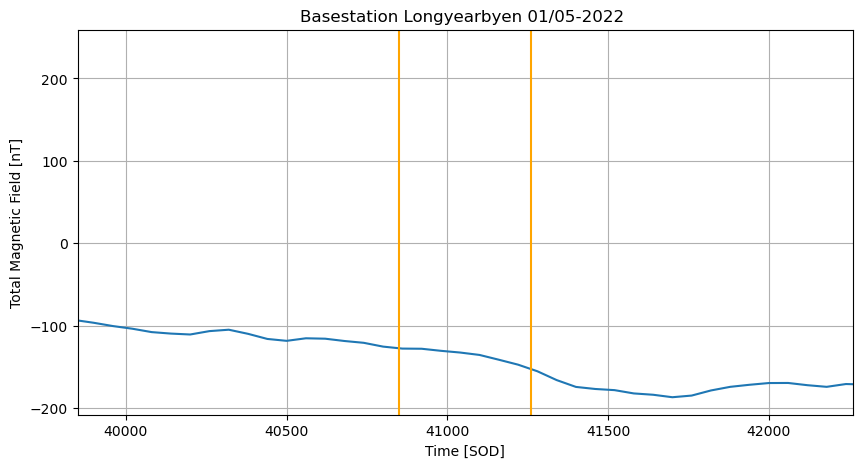

In [101]:
fig = plt.figure(figsize=(2*N, N))
plt.plot(BS.SOD, BS.centered)
plt.grid()
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.title(r"Basestation Longyearbyen 01/05-2022 ")
plt.axvline(x = min(dat4.SOD), color = 'orange', label = 'axvline - full height')
plt.axvline(x = max(dat4.SOD), color = 'orange', label = 'axvline - full height')
plt.xlim(min(dat4.SOD)-1000, max(dat4.SOD)+1000)
# plt.ylim(0, 10)

plt.show()

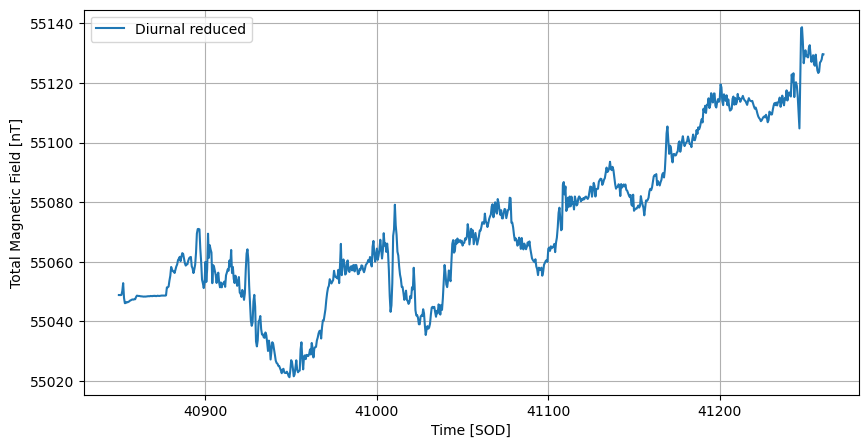

In [102]:
ref_value = np.interp(dat4.SOD, BS.SOD, BS.centered)
dat4["External"] = ref_value
dat4["Internal"] = dat4.nT - dat4.External
# dat4["diurnal_reduced"] = dat4.nT - dat4.Diff_BASE_meas

fig = plt.figure(figsize=(2*N, N))
# plt.plot(dat4.SOD, dat4.nT, label="Measured")
plt.plot(dat4.SOD, dat4.Internal, label="Diurnal reduced")
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.legend()
plt.grid()
plt.show()


## Calculate IGRF/CHAOS core model

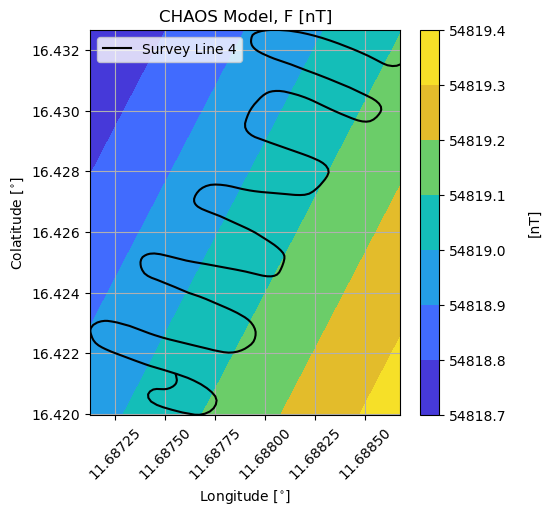

In [103]:

Chaos_path = Path("..", "Data", "CHAOS-7.10.mat")
## Computation of the CHAOS model in all data location. 
#Start with small area 
# create full grid Based on the Bigger survey area. 
dat4["colat"] = 90 - dat4.lat

radius = 6371 # km, earth radius
theta = np.linspace(dat4.colat.min(), dat4.colat.max(), 1000)  # colatitude in degrees
phi = np.linspace(dat4.lon.min(), dat4.lon.max(), 1000)  # longitude in degrees

phi_grid, theta_grid = np.meshgrid(phi, theta)
radius_grid = radius*np.ones(phi_grid.shape)

time = cp.data_utils.mjd2000(2022, 5, 1)  # modified Julian date

# load the CHAOS model
model = cp.load_CHAOS_matfile(Chaos_path)

# compute field components on the grid using the Gauss coefficients
B_radius, B_theta, B_phi = model.synth_values_tdep(time, radius, theta, phi, grid=True,nmax=13)
X = -B_theta
Y = B_phi
Z = -B_radius

F_chaos = np.sqrt(X**2 + Y**2 + Z**2)

plt.figure(figsize=(5,5))
sc = plt.contourf(theta, phi, F_chaos, cmap=parula_map)
plt.plot(dat4.colat, dat4.lon, "black", label="Survey Line 4")
plt.xlabel(r'Longitude [$^{\circ}$]')
plt.ylabel(r'Colatitude [$^{\circ}$]')
plt.title('CHAOS Model, F [nT]')
plt.grid()
cbar = plt.colorbar(sc)
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label("[nT]")

cbar.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.1f'))
plt.xticks(rotation=45)
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.legend()
output_file = Path("..", "Figures", "CHAOS_Line4.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")
plt.show()

In [104]:
import warnings
warnings.filterwarnings('ignore')
f_chaos = interp2d(theta,phi+90,F_chaos,'cubic')
interp_chaos = []
for lat,lon in zip(dat4.lat,dat4.lon):
    interp_chaos.extend(f_chaos(lon,lat))
dat4["CHAOS"] = interp_chaos
dat4["lithospheric"] = dat4.Internal - dat4.CHAOS


In [105]:
for i in range(len(limits.ID)):  # Assuming you want to create 3 dataframes (Line_A, Line_B, Line_C)
    # Create dataframe using create_df() function with corresponding indices
    line_name = "Line_" + chr(ord('A') + i)  # Convert index to corresponding letter
    Lines[line_name]["lithospheric"] = dat4.lithospheric[limits.Lowerlim[i]:limits.Upperlim[i]]


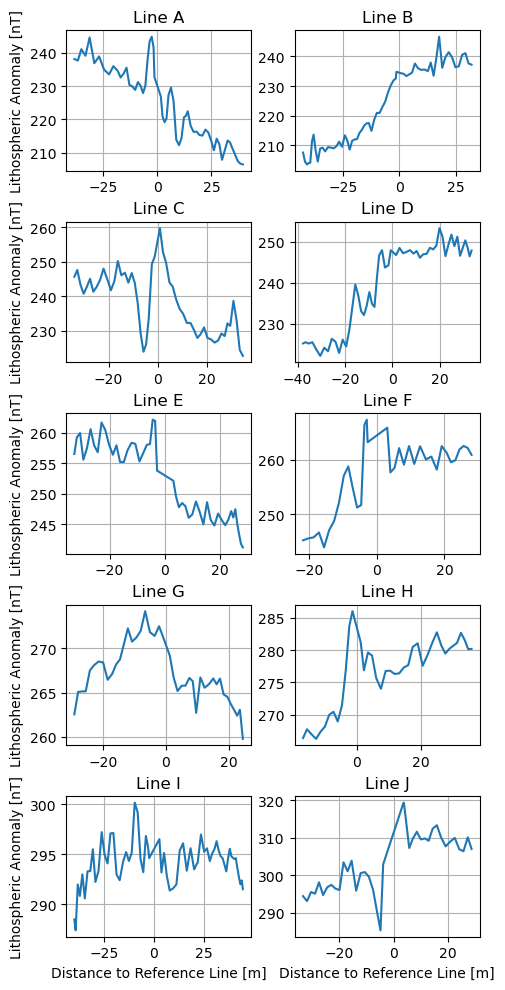

In [304]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(5, 10))

# Define the lines
lines = ["Line_A", "Line_B", "Line_C", "Line_D", "Line_E", "Line_F", "Line_G", "Line_H", "Line_I", "Line_J"]

# Iterate over the lines and plot them in subplots
for i, line in enumerate(lines):
    # Determine the subplot indices
    row = i // 2
    col = i % 2

    # Select the subplot
    ax = axes[row, col]

    # Flip the data for specific lines
    if line in ["Line_B", "Line_D", "Line_F", "Line_H", "Line_J"]:
        flipped_nT = np.flip(Lines[line].lithospheric)
        flipped_Dist_to_ref = np.flip(Lines[line].Dist_to_ref)
    else:
        flipped_nT = Lines[line].lithospheric
        flipped_Dist_to_ref = Lines[line].Dist_to_ref
    # flipped_nT = np.flip(Lines[line].lithospheric)
    # flipped_Dist_to_ref = np.flip(Lines[line].Dist_to_ref)

    # Plot the line
    # ax.plot(range(len(flipped_nT)), flipped_nT)
    ax.plot(flipped_Dist_to_ref, flipped_nT)
    # Show y-axis only on the left plots
    if col == 0:
        ax.set_ylabel("Lithospheric Anomaly [nT]")

    # Show x-axis label only on the bottom plots
    if row == 4:
        ax.set_xlabel("Distance to Reference Line [m]")

    # Set subplot title
    ax.set_title(lines[i].split("_")[0] + " " + lines[i].split("_")[1])

    # Add gridlines
    ax.grid()

# Adjust the spacing between subplots
plt.tight_layout(w_pad=0.5, h_pad=0.5)
output_file = Path("..", "Figures", "results_cross_dyke.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

# Show the plot
plt.show()


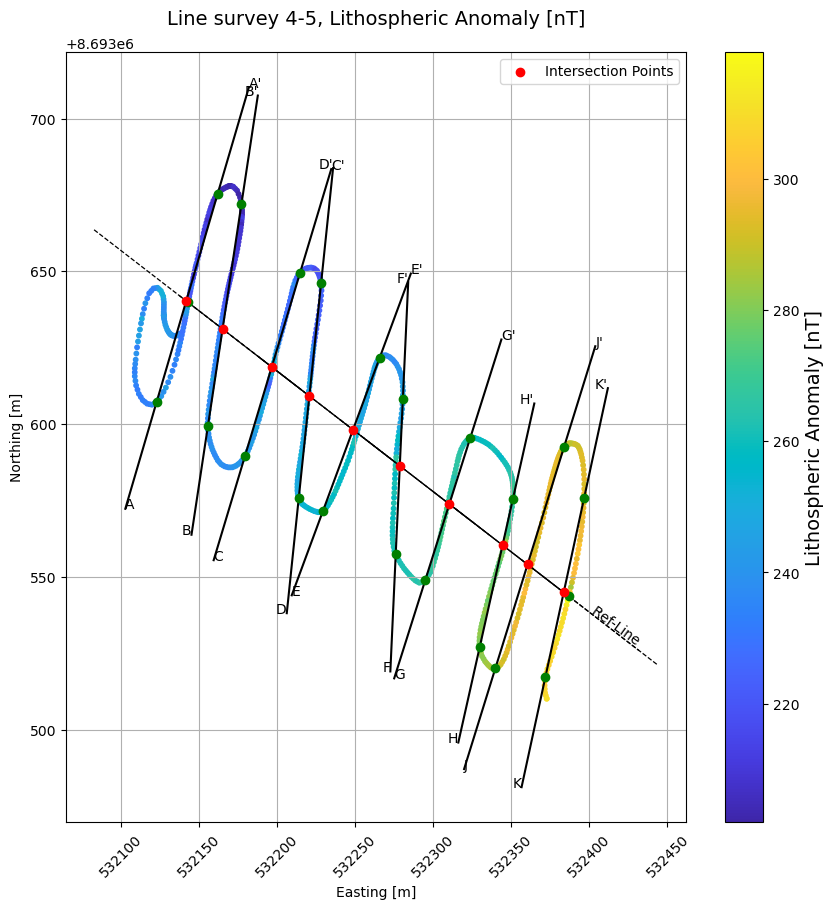

In [107]:

fig = plt.figure(figsize=(2*N, 2*N))
Overshoot = np.array([20, 32, 20, 22, 20, 8, 20, 35, 20, 40])

# Determine Reference line 
x1 = 152
x2 = 796
m1 = [dat4.Easting[x1], dat4.Easting[x2]]
m2 = [dat4.Northing[x1], dat4.Northing[x2]]
coefficients_ = np.polyfit(m1, m2, 1)

# Let's compute the values of the line...
polynomial_ = np.poly1d(coefficients_)
x_axis_ = np.linspace(dat4.Easting[limits.Lowerlim]-40,dat4.Easting[limits.Upperlim]+60,100)
y_axis_ = polynomial_(x_axis_)

intersection_points = []

for i in range(limits.shape[0]):
    # Define the known points
    x = [dat4.Easting[limits.Lowerlim[i]], dat4.Easting[limits.Upperlim[i]]]
    y = [dat4.Northing[limits.Lowerlim[i]], dat4.Northing[limits.Upperlim[i]]]

    # Calculate the coefficients. This line answers the initial question. 
    coefficients = np.polyfit(x, y, 1)

    # Let's compute the values of the line...
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(dat4.Easting[limits.Lowerlim[i]]-Overshoot[i],dat4.Easting[limits.Upperlim[i]]+Overshoot[i],100)
    y_axis = polynomial(x_axis)

    # ...and plot the points and the line
    plt.plot(x_axis, y_axis, color="black")
    plt.plot( x[0], y[0], 'go' )
    plt.plot( x[1], y[1], 'go' )

    # Determine intersection 
    x_inter = find_intersection(polynomial_, polynomial)
    y_inter = polynomial_(x_inter)

    intersection_points.append((x_inter, y_inter))

    if i % 2 == 0:
        plt.text(x_axis[0], y_axis[0], limits.Start[i], ha="left")
        plt.text(x_axis[-1], y_axis[-1], limits.End[i], ha="left")
    else:
        plt.text(x_axis[0], y_axis[0], limits.Start[i], ha="right")
        plt.text(x_axis[-1], y_axis[-1], limits.End[i], ha="right")  
# sc = ax2.scatter(data.lon,data.lat,c=data.nT,facecolors="None",cmap=parula_map, alpha=.05)

sc = plt.scatter(dat4.Easting, dat4.Northing, 10, c=dat4.lithospheric,facecolors="None",cmap=parula_map)
cbar=fig.colorbar(sc)
plt.grid()
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")
cbar.set_label('Lithospheric Anomaly [nT]',fontsize=14)
cbar.set_alpha(1)
cbar.draw_all()

plt.title(r"Line survey 4-5, Lithospheric Anomaly [nT]", pad=20, fontdict={'fontsize': 14})
plt.xticks(rotation = 45)

# ...and plot the points and the line
plt.plot(x_axis_, y_axis_, color="black", linewidth=.9, linestyle="--")
plt.text(x_axis_[-1][-3], y_axis_[-1][-3], "     Ref-Line", rotation = -36, rotation_mode = 'anchor')
plt.plot(dat4.Easting[x1], dat4.Northing[x1], "go")
plt.plot(dat4.Easting[x2], dat4.Northing[x2], "go")

# Extract x and y coordinates from the intersection points
x_coords = [point[0][0] for point in intersection_points]
y_coords = [point[1][0] for point in intersection_points]

# Plot the intersection points
plt.scatter(x_coords, y_coords, color='red', label='Intersection Points', zorder = 10)
plt.legend()

plt.show()


## Test orthophotos 

In [108]:
import rasterio
def Import_tiff(file): 
    src = rasterio.open(file)

    # Read the individual bands of the image
    band1 = src.read(1)  # Assuming you want to plot the first band
    band2 = src.read(2)  # Assuming you want to plot the second band
    band3 = src.read(3)  # Assuming you want to plot the third band

    # Create the RGB image by stacking the bands
    rgb_image = np.stack((band1, band2, band3), axis=-1)

    # Define the extent of the image using the source bounds
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
    ax.imshow(rgb_image, extent=extent)

    return rgb_image, extent

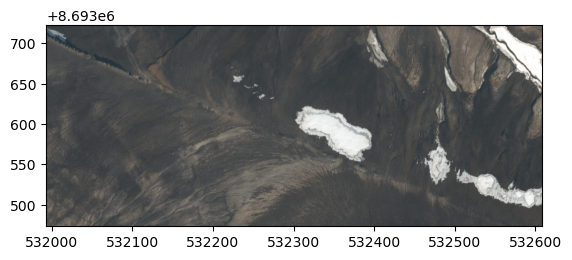

In [109]:
import rasterio
import matplotlib.pyplot as plt

file_path = Path("..", "Data", "Tiff", "Ortho.tif")
file_path = Path("..", "Data", "Tiff", "Even_closer", "Export.tif")
src = rasterio.open(file_path)

# Read the individual bands of the image
band1 = src.read(1)  # Assuming you want to plot the first band
band2 = src.read(2)  # Assuming you want to plot the second band
band3 = src.read(3)  # Assuming you want to plot the third band

# Create the RGB image by stacking the bands
rgb_image = np.stack((band1, band2, band3), axis=-1)

# Define the extent of the image using the source bounds
extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

# Plot the RGB image with georeferencing information
fig, ax = plt.subplots()
ax.imshow(rgb_image, extent=extent)

# Display the plot
plt.show()



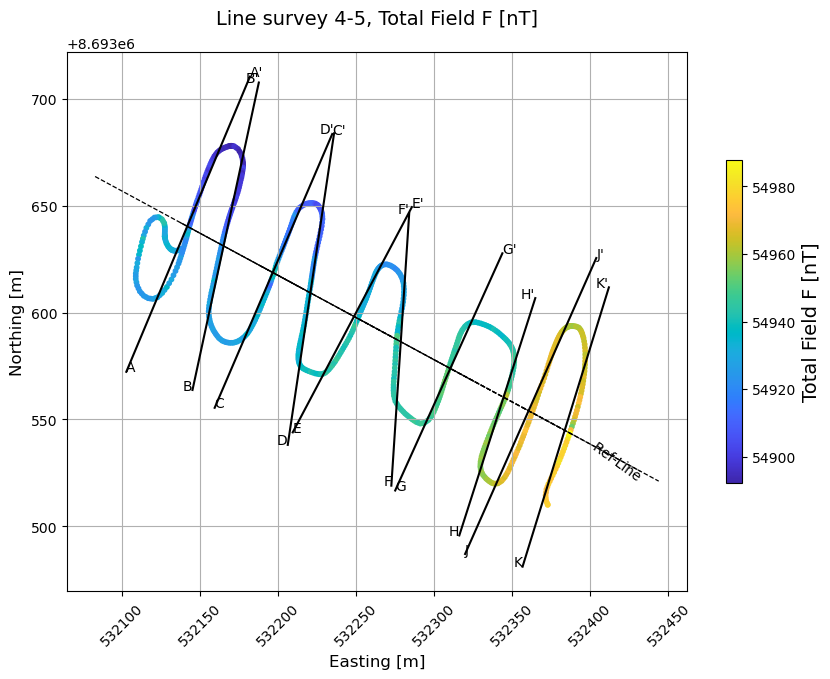

In [306]:
fig, ax = plt.subplots(figsize=(10, 7))
Overshoot = np.array([20, 32, 20, 22, 20, 8, 20, 35, 20, 40])

# Determine Reference line 
x1 = 152
x2 = 796
m1 = [dat4.Easting[x1], dat4.Easting[x2]]
m2 = [dat4.Northing[x1], dat4.Northing[x2]]
coefficients_ = np.polyfit(m1, m2, 1)

# Let's compute the values of the line...
polynomial_ = np.poly1d(coefficients_)
x_axis_ = np.linspace(dat4.Easting[limits.Lowerlim]-40,dat4.Easting[limits.Upperlim]+60,100)
y_axis_ = polynomial_(x_axis_)

intersection_points = []

for i in range(limits.shape[0]):
    # Define the known points
    x = [dat4.Easting[limits.Lowerlim[i]], dat4.Easting[limits.Upperlim[i]]]
    y = [dat4.Northing[limits.Lowerlim[i]], dat4.Northing[limits.Upperlim[i]]]

    # Calculate the coefficients. This line answers the initial question. 
    coefficients = np.polyfit(x, y, 1)

    # Let's compute the values of the line...
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(dat4.Easting[limits.Lowerlim[i]]-Overshoot[i],dat4.Easting[limits.Upperlim[i]]+Overshoot[i],100)
    y_axis = polynomial(x_axis)

    # ...and plot the points and the line
    plt.plot(x_axis, y_axis, color="black")
    # plt.plot( x[0], y[0], 'go' )
    # plt.plot( x[1], y[1], 'go' )

    # Determine intersection 
    x_inter = find_intersection(polynomial_, polynomial)
    y_inter = polynomial_(x_inter)

    intersection_points.append((x_inter, y_inter))

    if i % 2 == 0:
        plt.text(x_axis[0], y_axis[0], limits.Start[i], ha="left")
        plt.text(x_axis[-1], y_axis[-1], limits.End[i], ha="left")
    else:
        plt.text(x_axis[0], y_axis[0], limits.Start[i], ha="right")
        plt.text(x_axis[-1], y_axis[-1], limits.End[i], ha="right")  
# sc = ax2.scatter(data.lon,data.lat,c=data.nT,facecolors="None",cmap=parula_map, alpha=.05)

sc = plt.scatter(dat4.Easting, dat4.Northing, 10, c=dat4.nT,facecolors="None",cmap=parula_map)
cbar=fig.colorbar(sc, shrink=0.6)
plt.grid()
plt.xlabel("Easting [m]",fontsize=12)
plt.ylabel("Northing [m]",fontsize=12)
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")
cbar.set_label('Total Field F [nT]',fontsize=14)
cbar.set_alpha(1)
cbar.draw_all()

plt.title(r"Line survey 4-5, Total Field F [nT]", pad=20, fontdict={'fontsize': 14})
plt.xticks(rotation = 45)

# ...and plot the points and the line
plt.plot(x_axis_, y_axis_, color="black", linewidth=.9, linestyle="--")
plt.text(x_axis_[-1][-3], y_axis_[-1][-3], "     Ref-Line", rotation = -36, rotation_mode = 'anchor')
# plt.plot(dat4.Easting[x1], dat4.Northing[x1], "go")
# plt.plot(dat4.Easting[x2], dat4.Northing[x2], "go")

# Extract x and y coordinates from the intersection points
x_coords = [point[0][0] for point in intersection_points]
y_coords = [point[1][0] for point in intersection_points]

# Plot the intersection points
# plt.scatter(x_coords, y_coords, color='red', label='Intersection Points', zorder = 10)

ax.imshow(rgb_image, extent=extent)
output_file = Path("..", "Figures", "results_cross_dyke__.png")
plt.savefig(output_file, format="png", bbox_inches="tight")

# sc = plt.scatter(dat4.Easting, dat4.Northing, 10, c=dat4.nT,facecolors="None",cmap=parula_map)
# cbar=fig.colorbar(sc)
# # plt.grid()
# plt.xlabel("Easting [m]")
# plt.ylabel("Northing [m]")
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")
# cbar.set_label('Lithospheric Anomaly [nT]',fontsize=14)
# cbar.set_alpha(1)
# cbar.draw_all()
# output_file = Path("..", "Figures", "Litho_ano_Line_4.pdf")
# plt.savefig(output_file, format="pdf", bbox_inches="tight")
plt.show()

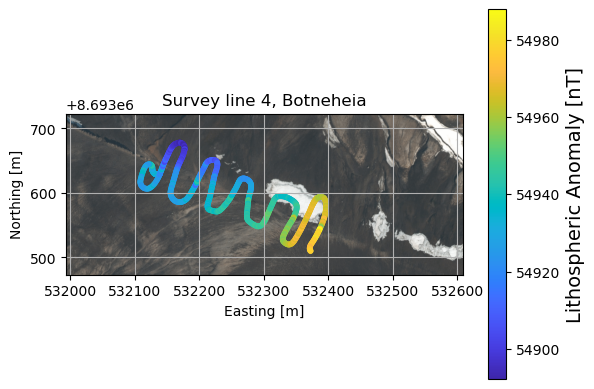

In [111]:
fig, ax = plt.subplots()
ax.imshow(rgb_image, extent=extent)

sc = plt.scatter(dat4.Easting, dat4.Northing, 10, c=dat4.nT,facecolors="None",cmap=parula_map)
cbar=fig.colorbar(sc)
plt.grid()
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")
cbar.set_label('Lithospheric Anomaly [nT]',fontsize=14)
cbar.set_alpha(1)
cbar.draw_all()
plt.title("Survey line 4, Botneheia")

plt.show()


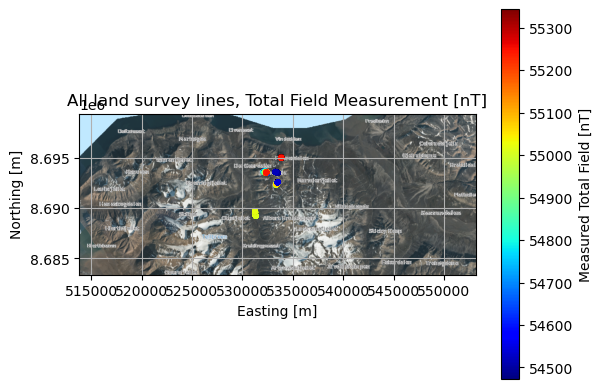

In [112]:
fig, ax = plt.subplots()
# file_path = Path("..", "Data", "Tiff", "Ortho.tif")
file_path = Path("..", "Data", "Tiff", "Further", "Export.tif")
src1 = rasterio.open(file_path)

# Read the individual bands of the image
band11 = src1.read(1)  # Assuming you want to plot the first band
band21 = src1.read(2)  # Assuming you want to plot the second band
band31 = src1.read(3)  # Assuming you want to plot the third band

# Create the RGB image by stacking the bands
rgb_image1 = np.stack((band11, band21, band31), axis=-1)

# Define the extent of the image using the source bounds
extent1 = (src1.bounds.left, src1.bounds.right, src1.bounds.bottom, src1.bounds.top)

ax.imshow(rgb_image1, extent=extent1)

for i, df in enumerate(df_list): 
    plt.scatter(df["Easting"], df["Northing"], 10, df["nT"])
plt.colorbar(label="Measured Total Field [nT]")
plt.set_cmap("jet")
plt.ylabel(r"Northing [m]")
plt.xlabel(r"Easting [m]")
plt.title(r"All land survey lines, Total Field Measurement [nT]")
plt.grid()
plt.show()

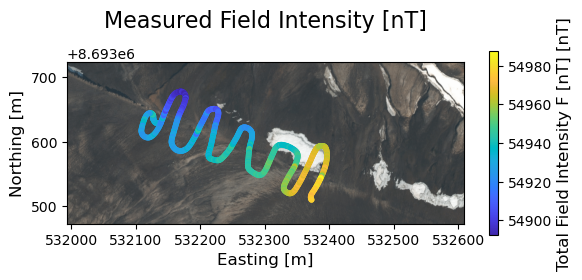

In [113]:
file = Path("..", "Data", "Tiff", "Even_closer", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)
sc = plt.scatter(dat4.Easting, dat4.Northing, 10, c = dat4.nT, facecolors="None",cmap=parula_map)
plt.title('Measured Field Intensity [nT]\n',fontsize=16)
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()
plt.xlabel("Easting [m]",fontsize=12)
plt.ylabel("Northing [m]",fontsize=12)
output_file = Path("..", "Figures", "Raw_data_line_4.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

plt.show()

In [309]:
prof2_sorted.nT_meas

0      54470.92
1      54472.34
2      54464.63
3      54487.02
4      54460.21
         ...   
972    54431.51
973    54408.35
974    54362.19
975    54365.29
976    54406.51
Name: nT_meas, Length: 977, dtype: float64

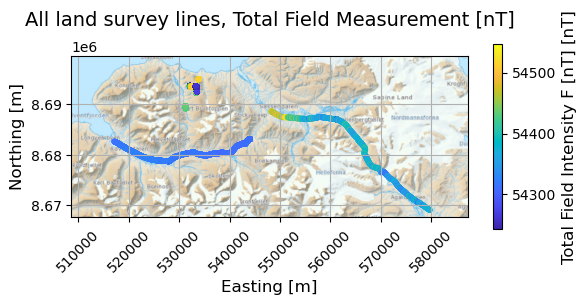

In [311]:
file = Path("..", "Data", "Tiff", "pres_1", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)

for i, df in enumerate(df_list): 
    sc = plt.scatter(df["Easting"], df["Northing"], 10, df["nT"], facecolors="None",cmap=parula_map)
sc = plt.scatter(prof2_sorted.Easting[:-100], prof2_sorted.Northing[:-100], 10, c = prof2_sorted.nT_meas[:-100], facecolors="None",cmap=parula_map)
plt.scatter(prof1.Easting, prof1.Northing, 10, c = prof1.nT_meas, facecolors="None",cmap=parula_map)
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()
plt.ylabel(r"Northing [m]",fontsize=12)
plt.xlabel(r"Easting [m]",fontsize=12)
plt.title("All land survey lines, Total Field Measurement [nT]\n",fontsize=14)
plt.grid()
plt.xticks(rotation = 45)
output_file = Path("..", "Figures", "Data_overview.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

plt.show()

In [115]:
# file = Path("..", "Data", "Tiff", "pres_2", "Export.tif")
# fig, ax = axs = plt.subplots()
# rgb_image, extent = Import_tiff(file)

# for i, df in enumerate(df_list): 
#     sc = plt.scatter(df["Easting"], df["Northing"], 10, df["nT"], facecolors="None",cmap=parula_map)
# sc = plt.scatter(prof2_sorted.Easting[:-840], prof2_sorted.Northing[:-840], 10, c = prof2_sorted.ano_nT[:-840], facecolors="None",cmap=parula_map)
# plt.scatter(prof1.Easting[:-2500], prof1.Northing[:-2500], 10, c = prof1.ano_nT[:-2500], facecolors="None",cmap=parula_map)
# cbar=fig.colorbar(sc, shrink=0.5)
# cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=12)
# cbar.set_alpha(1)
# cbar.draw_all()
# plt.ylabel(r"Northing [m]",fontsize=12)
# plt.xlabel(r"Easting [m]",fontsize=12)
# plt.title("All land survey lines, Total Field Measurement [nT]\n",fontsize=14)
# plt.grid()
# plt.xticks(rotation = 45)
# plt.show()

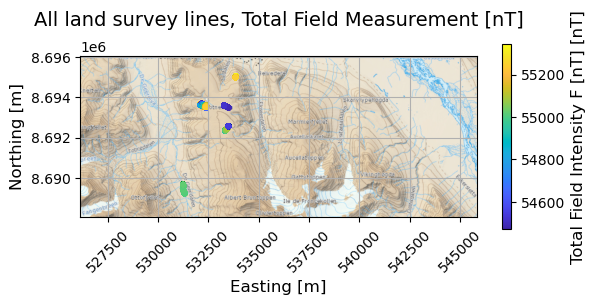

In [116]:
file = Path("..", "Data", "Tiff", "pres_3", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)

for i, df in enumerate(df_list): 
    sc = plt.scatter(df["Easting"], df["Northing"], 10, df["nT"], facecolors="None",cmap=parula_map)
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()
plt.ylabel(r"Northing [m]",fontsize=12)
plt.xlabel(r"Easting [m]",fontsize=12)
plt.title("All land survey lines, Total Field Measurement [nT]\n",fontsize=14)
plt.grid()
plt.xticks(rotation = 45)
plt.show()

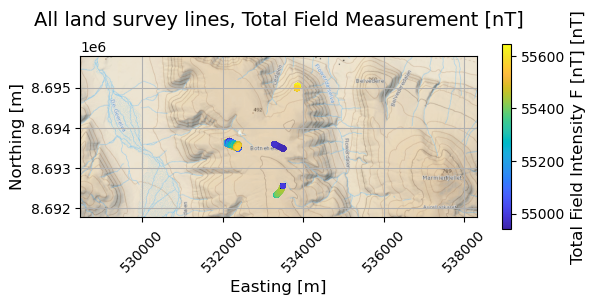

In [117]:
file = Path("..", "Data", "Tiff", "pres_4", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)

for i, df in enumerate(df_list): 
    if i != 7:
        sc = plt.scatter(df["Easting"], df["Northing"], 10, df["nT"], facecolors="None",cmap=parula_map)
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()
plt.ylabel(r"Northing [m]",fontsize=12)
plt.xlabel(r"Easting [m]",fontsize=12)
plt.title("All land survey lines, Total Field Measurement [nT]\n",fontsize=14)
plt.grid()
plt.xticks(rotation = 45)
plt.show()

## Line 1 & 2 (Helvetesdalen Over Diabas)

In [118]:
def spatial_cut(df, X, spec): 
    """
    X:          Hyperparameter for optimizing spatial cutoff
    df:         Dataframe, needs to include a Easting, Northing and Time column 
    spec:       int: 0 if data are removed from start, 1 if data should be removed from back
    return:     
    df_sorted:  Dataframe with a cutoff at X value. 
    """
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    if spec == 0: 
        axs[0].plot(df.time, df.Easting, zorder = 1, label="Raw Data")
        axs[0].plot(df.time[X:], df.Easting[X:], zorder = 10, label="Spatial Sorted")
        axs[1].plot(df.time, df.Northing, zorder = 1, label="Raw Data")
        axs[1].plot(df.time[X:], df.Northing[X:], zorder = 10, label="Spatial Sorted")
        df_sorted = df.drop(df.index[:X])
    else: 
        axs[0].plot(df.time, df.Easting, zorder = 1, label="Raw Data")
        axs[0].plot(df.time[:X], df.Easting[:X], zorder = 10, label="Spatial Sorted")
        axs[1].plot(df.time, df.Northing, zorder = 1, label="Raw Data")
        axs[1].plot(df.time[:X], df.Northing[:X], zorder = 10, label="Spatial Sorted")
        df_sorted = df.drop(df.index[X:])
    
    axs[0].set_title('Easting VS. Time')
    axs[0].set_ylabel("Easting [m]")
    axs[0].set_xlabel("Time")
    axs[0].legend()
    axs[0].grid()

    axs[1].set_title('Northing VS. Time')
    axs[1].set_ylabel("Northing [m]")
    axs[1].set_xlabel("Time")
    axs[1].legend()
    axs[1].grid()
    plt.show()

    df_sorted.reset_index(drop=True, inplace=True)
    return df_sorted



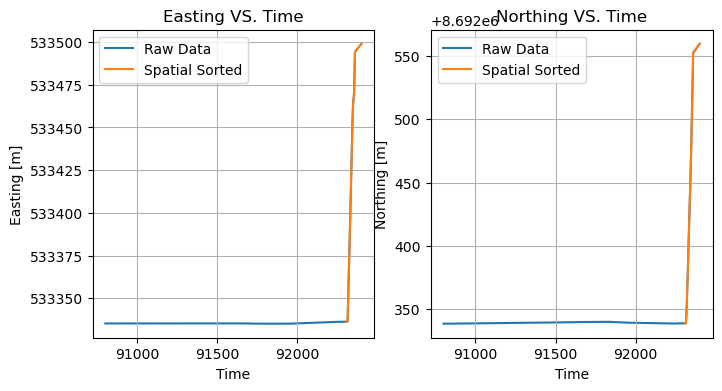

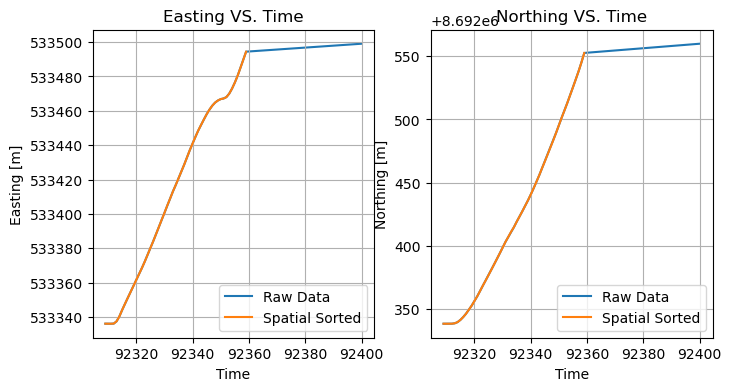

In [119]:
dat1_sorted = spatial_cut(dat1, 190, 0)
dat1_sorted = spatial_cut(dat1_sorted, 51, 1)


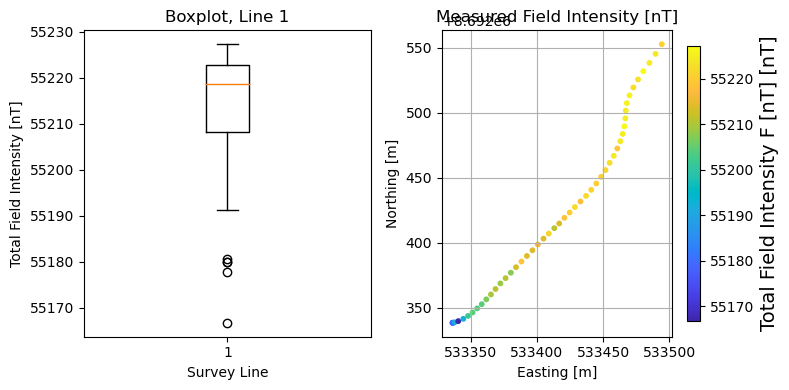

In [120]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first subplot
axs[0].boxplot(dat1_sorted.nT)
axs[0].set_title('Boxplot, Line 1')
axs[0].set_ylabel("Total Field Intensity [nT]")
axs[0].set_xlabel("Survey Line")


plt.grid()
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")

# Plot the second subplot
sc = axs[1].scatter(dat1_sorted.Easting, dat1_sorted.Northing, 10, c = dat1_sorted.nT, facecolors="None",cmap=parula_map)
axs[1].set_title('Measured Field Intensity [nT]')
cbar=fig.colorbar(sc, shrink=0.9)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=14)
cbar.set_alpha(1)
cbar.draw_all()
# sc.set_clim(55050, 55250)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()



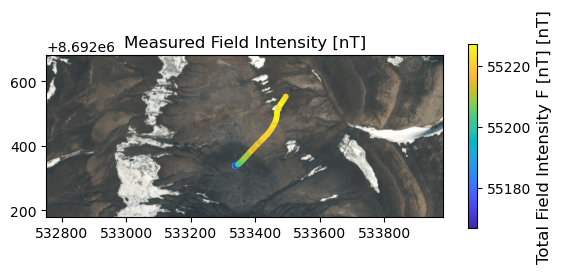

In [121]:
file = Path("..", "Data", "Tiff", "Line_1_closer", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)
sc = plt.scatter(dat1_sorted.Easting, dat1_sorted.Northing, 10, c = dat1_sorted.nT, facecolors="None",cmap=parula_map)
plt.title('Measured Field Intensity [nT]')
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()

In [122]:
def time_convert(time_series, date_str): 
    """
    Input:          time_series: '%H:%M:%S.%f'
                    date_str:    'dd/mm/year'
    """
    # Define the date
    # date_str = '24/08/2018'
    date_format = '%d/%m/%Y'
    date = datetime.strptime(date_str, date_format).date()

    # Convert time series to formatted time strings
    formatted_times = []
    for time_value in time_series:
        time_str = str(int(time_value)).zfill(6)  # Convert to 6-digit string format
        hours = int(time_str[:2])
        minutes = int(time_str[2:4])
        seconds = int(time_str[4:6])
        microseconds = int((time_value % 1) * 1e6)  # Extract microseconds
        datetime_obj = datetime.combine(date, datetime.min.time())  # Create datetime object with date and midnight time
        datetime_obj = datetime_obj.replace(hour=hours, minute=minutes, second=seconds, microsecond=microseconds)
        formatted_time = datetime_obj.time().strftime('%H:%M:%S.%f')
        formatted_times.append(formatted_time)

    return formatted_times

In [123]:
def get_sec(time): 
    """
    hh:mm:ss.s => SOD (Seconds Of Day)
    """
    SOD = []
    for i in range(len(time)): 
        SOD_value = int(time[i].split(":")[0])*3600+ int(time[i].split(":")[1])*60 + float(time[i].split(":")[2])
        SOD.append(SOD_value)

    return SOD


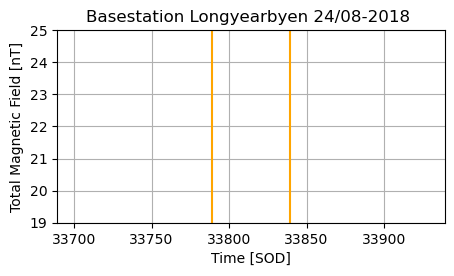

In [124]:
dat1_sorted["Formatted_time"] = time_convert(dat1_sorted.time, '24/08/2018')
dat1_sorted["SOD"] = get_sec(dat1_sorted.Formatted_time)

fig = plt.figure(figsize=(N, .5*N))
plt.plot(BS.SOD, BS.centered)
plt.grid()
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.title(r"Basestation Longyearbyen 24/08-2018 ")
plt.axvline(x = min(dat1_sorted.SOD), color = 'orange', label = 'axvline - full height')
plt.axvline(x = max(dat1_sorted.SOD), color = 'orange', label = 'axvline - full height')
plt.xlim(min(dat1_sorted.SOD)-100, max(dat1_sorted.SOD)+100)
plt.ylim(19, 25)

plt.show()


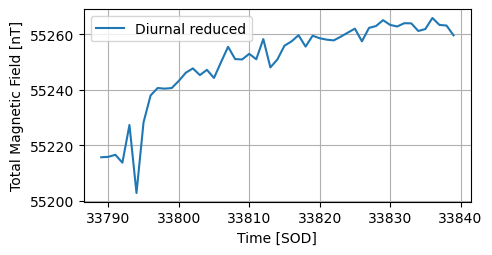

In [125]:
ref_value = np.interp(dat1_sorted.SOD, BS.SOD, BS.centered)
dat1_sorted["External"] = ref_value
dat1_sorted["Internal"] = dat1_sorted.nT - dat1_sorted.External
# dat4["diurnal_reduced"] = dat4.nT - dat4.Diff_BASE_meas

fig = plt.figure(figsize=(N, 0.5*N))
# plt.plot(dat4.SOD, dat4.nT, label="Measured")
plt.plot(dat1_sorted.SOD, dat1_sorted.Internal, label="Diurnal reduced")
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.legend()
plt.grid()
plt.show()

In [126]:
def Calc_CHAOS(Chaos_path, df, date): 
    """
    Input: 
        Chaos_path:             Path to CHAOS.mat file, containing model parameters 
        df:                     Dataframe containing the lat and longitude of survey, needs to contain a 
                                column of Internal values (df.Internal)
        date:                   Date in format "dd/mm-year"

    Output: 
        Lithospheric:           Calculated Crustal anomaly. 
    """

    df["colat"] = 90 - df.lat

    radius = 6371 # km, earth radius
    theta = np.linspace(df.colat.min(), df.colat.max(), 1000)  # colatitude in degrees
    phi = np.linspace(df.lon.min(), df.lon.max(), 1000)  # longitude in degrees

    phi_grid, theta_grid = np.meshgrid(phi, theta)
    radius_grid = radius*np.ones(phi_grid.shape)

    year = int((date.split("/")[1]).split("-")[1])
    month = int((date.split("/")[1]).split("-")[0])
    day = int(date.split("/")[0])

    time = cp.data_utils.mjd2000(year, month, day)  # modified Julian date

    # load the CHAOS model
    model = cp.load_CHAOS_matfile(Chaos_path)

    # compute field components on the grid using the Gauss coefficients
    B_radius, B_theta, B_phi = model.synth_values_tdep(time, radius, theta, phi, grid=True,nmax=13)
    X = -B_theta
    Y = B_phi
    Z = -B_radius

    F_chaos = np.sqrt(X**2 + Y**2 + Z**2)

    plt.figure(figsize=(5,5))
    sc = plt.contourf(theta, phi, F_chaos, cmap=parula_map)
    plt.plot(df.colat, df.lon, "black", label="Survey Line")
    plt.xlabel(r'Longitude [$^{\circ}$]')
    plt.ylabel(r'Colatitude [$^{\circ}$]')
    plt.title('CHAOS Model, F [nT]')
    plt.grid()
    cbar = plt.colorbar(sc)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.set_label("[nT]")

    cbar.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.1f'))
    plt.xticks(rotation=45)
    plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
    plt.legend()
    plt.show()

    f_chaos = interp2d(theta,phi+90,F_chaos,'cubic')
    interp_chaos = []
    for lat,lon in zip(df.lat,df.lon):
        interp_chaos.extend(f_chaos(lon,lat))
    CHAOS = interp_chaos
    lithospheric = df.Internal - CHAOS

    return lithospheric

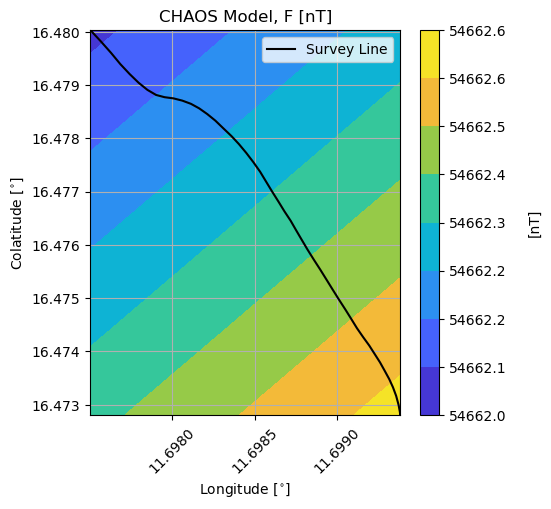

In [127]:

Chaos_path = Path("..", "Data", "CHAOS-7.10.mat")
date = "24/08-2018"
dat1_sorted["Lithospheric"] = Calc_CHAOS(Chaos_path, dat1_sorted, date)

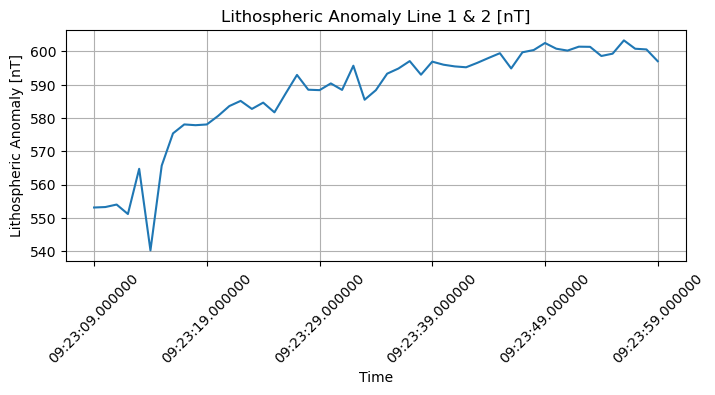

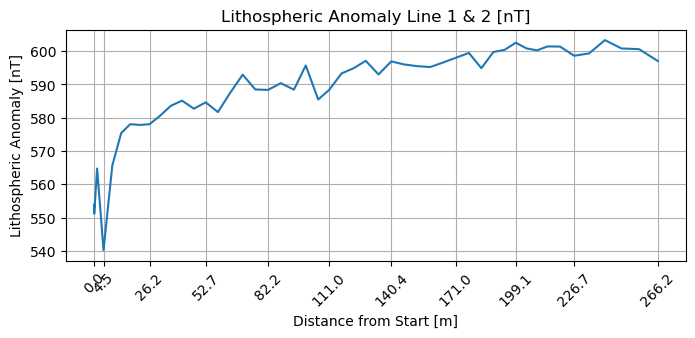

In [128]:
fig = plt.figure(figsize=(8,3))
plt.plot(dat1_sorted.Formatted_time, dat1_sorted.Lithospheric)
plt.grid()
plt.xlabel("Time")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Lithospheric Anomaly Line 1 & 2 [nT]")
plt.xticks(dat1_sorted.Formatted_time[::10], rotation = 45)

plt.show()

dat1_sorted["Dist"] = dist_from_ref(dat1_sorted.Easting, dat1_sorted.Easting[0], 
                                    dat1_sorted.Northing, dat1_sorted.Northing[0])
fig = plt.figure(figsize=(8,3))
plt.plot(dat1_sorted.Dist, dat1_sorted.Lithospheric)
plt.grid()
plt.xlabel("Distance from Start [m]")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Lithospheric Anomaly Line 1 & 2 [nT]")
plt.xticks(dat1_sorted.Dist[::5], rotation = 45)
plt.show()

## Line 3 (Helvetesdalen Parallell Dyke)

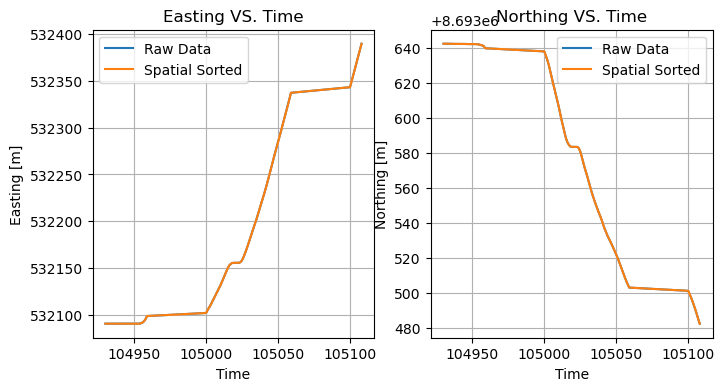

In [129]:
dat3_sorted = spatial_cut(dat3, 99, 1)

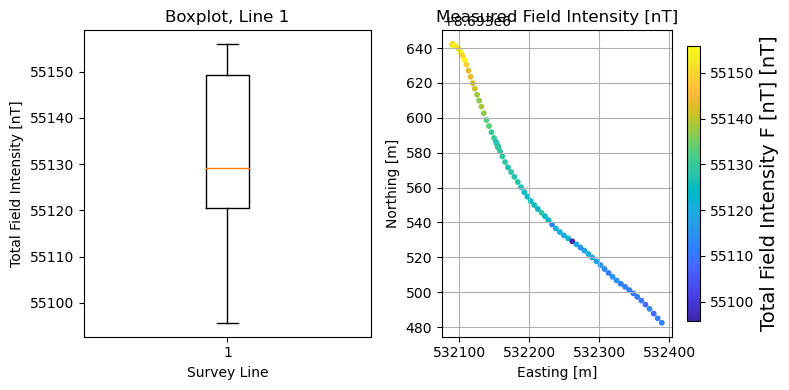

In [130]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first subplot
axs[0].boxplot(dat3_sorted.nT)
axs[0].set_title('Boxplot, Line 1')
axs[0].set_ylabel("Total Field Intensity [nT]")
axs[0].set_xlabel("Survey Line")


plt.grid()
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")

# Plot the second subplot
sc = axs[1].scatter(dat3_sorted.Easting, dat3_sorted.Northing, 10, c = dat3_sorted.nT, facecolors="None",cmap=parula_map)
axs[1].set_title('Measured Field Intensity [nT]')
cbar=fig.colorbar(sc, shrink=0.9)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=14)
cbar.set_alpha(1)
cbar.draw_all()
# sc.set_clim(55050, 55250)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()



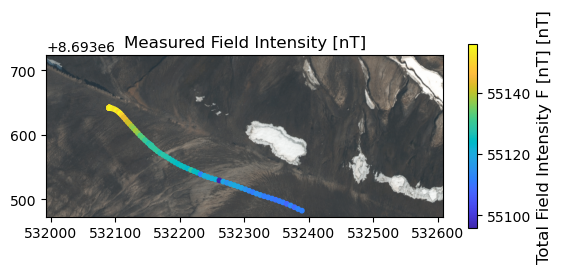

In [131]:
file = Path("..", "Data", "Tiff", "Even_closer", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)
sc = plt.scatter(dat3_sorted.Easting, dat3_sorted.Northing, 10, c = dat3_sorted.nT, facecolors="None",cmap=parula_map)
plt.title('Measured Field Intensity [nT]')
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()

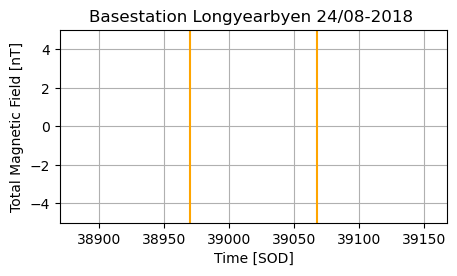

In [132]:
dat3_sorted["Formatted_time"] = time_convert(dat3_sorted.time, '24/08/2018')
dat3_sorted["SOD"] = get_sec(dat3_sorted.Formatted_time)

fig = plt.figure(figsize=(N, .5*N))
plt.plot(BS.SOD, BS.centered)
plt.grid()
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.title(r"Basestation Longyearbyen 24/08-2018 ")
plt.axvline(x = min(dat3_sorted.SOD), color = 'orange', label = 'axvline - full height')
plt.axvline(x = max(dat3_sorted.SOD), color = 'orange', label = 'axvline - full height')
plt.xlim(min(dat3_sorted.SOD)-100, max(dat3_sorted.SOD)+100)
plt.ylim(-5, 5)
plt.show()


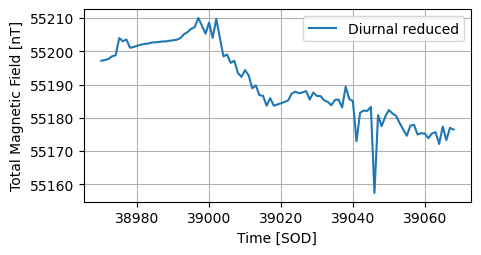

In [133]:
ref_value = np.interp(dat3_sorted.SOD, BS.SOD, BS.centered)
dat3_sorted["External"] = ref_value
dat3_sorted["Internal"] = dat3_sorted.nT - dat3_sorted.External
# dat4["diurnal_reduced"] = dat4.nT - dat4.Diff_BASE_meas

fig = plt.figure(figsize=(N, 0.5*N))
# plt.plot(dat4.SOD, dat4.nT, label="Measured")
plt.plot(dat3_sorted.SOD, dat3_sorted.Internal, label="Diurnal reduced")
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.legend()
plt.grid()
plt.show()

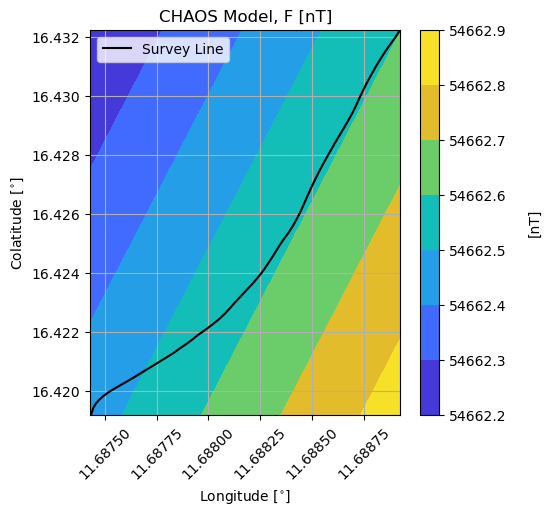

In [134]:
Chaos_path = Path("..", "Data", "CHAOS-7.10.mat")
date = "24/08-2018"
dat3_sorted["Lithospheric"] = Calc_CHAOS(Chaos_path, dat3_sorted, date)

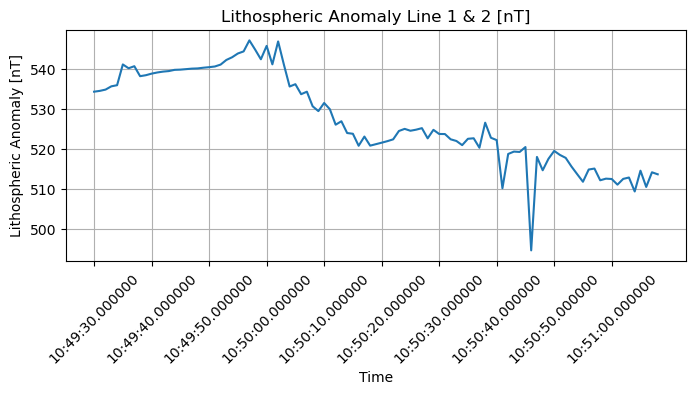

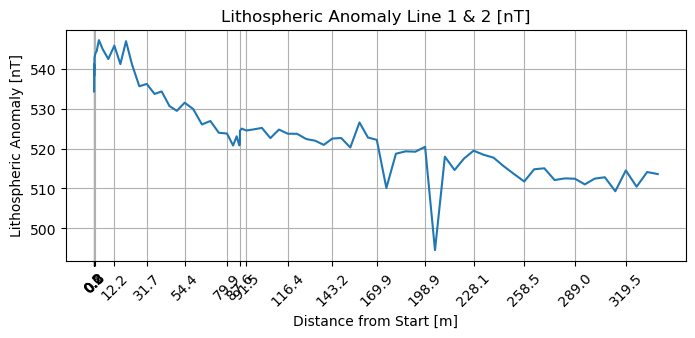

In [135]:
fig = plt.figure(figsize=(8,3))
plt.plot(dat3_sorted.Formatted_time, dat3_sorted.Lithospheric)
plt.grid()
plt.xlabel("Time")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Lithospheric Anomaly Line 1 & 2 [nT]")
plt.xticks(dat3_sorted.Formatted_time[::10], rotation = 45)

plt.show()

dat3_sorted["Dist"] = dist_from_ref(dat3_sorted.Easting, dat3_sorted.Easting[0], 
                                    dat3_sorted.Northing, dat3_sorted.Northing[0])
fig = plt.figure(figsize=(8,3))
plt.plot(dat3_sorted.Dist, dat3_sorted.Lithospheric)
plt.grid()
plt.xlabel("Distance from Start [m]")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Lithospheric Anomaly Line 1 & 2 [nT]")
plt.xticks(dat3_sorted.Dist[::5], rotation = 45)
plt.show()

## Line 6 (Helvetesdalen Second Area)

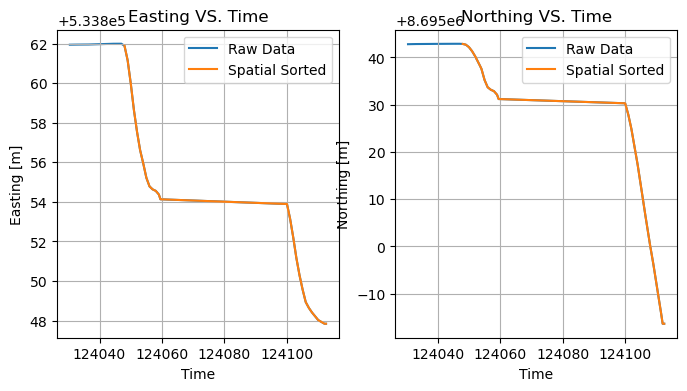

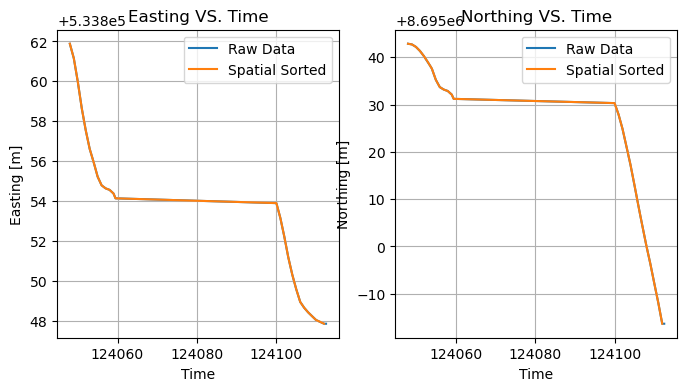

In [136]:
dat6_sorted = spatial_cut(dat6, 35, 0)
dat6_sorted = spatial_cut(dat6_sorted, 49, 1)

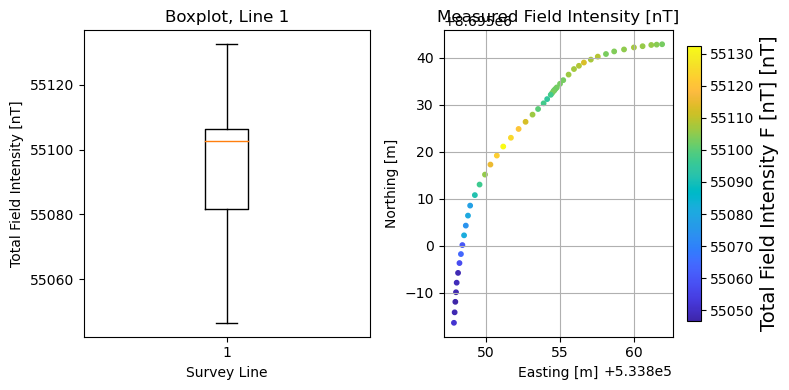

In [137]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first subplot
axs[0].boxplot(dat6_sorted.nT)
axs[0].set_title('Boxplot, Line 1')
axs[0].set_ylabel("Total Field Intensity [nT]")
axs[0].set_xlabel("Survey Line")


plt.grid()
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")

# Plot the second subplot
sc = axs[1].scatter(dat6_sorted.Easting, dat6_sorted.Northing, 10, c = dat6_sorted.nT, facecolors="None",cmap=parula_map)
axs[1].set_title('Measured Field Intensity [nT]')
cbar=fig.colorbar(sc, shrink=0.9)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=14)
cbar.set_alpha(1)
cbar.draw_all()
# sc.set_clim(55050, 55250)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

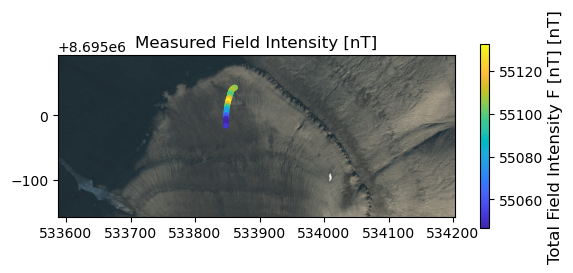

In [138]:


file = Path("..", "Data", "Tiff", "Line_6_even_closer", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)
sc = plt.scatter(dat6_sorted.Easting, dat6_sorted.Northing, 10, c = dat6_sorted.nT, facecolors="None",cmap=parula_map)
plt.title('Measured Field Intensity [nT]')
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()

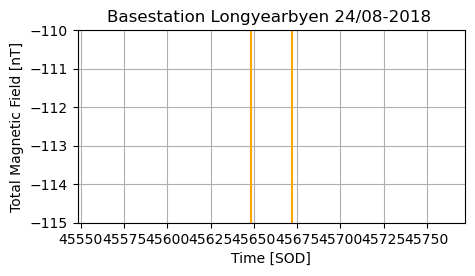

In [139]:
dat6_sorted["Formatted_time"] = time_convert(dat6_sorted.time, '24/08/2018')
dat6_sorted["SOD"] = get_sec(dat6_sorted.Formatted_time)

fig = plt.figure(figsize=(N, .5*N))
plt.plot(BS.SOD, BS.centered)
plt.grid()
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.title(r"Basestation Longyearbyen 24/08-2018 ")
plt.axvline(x = min(dat6_sorted.SOD), color = 'orange', label = 'axvline - full height')
plt.axvline(x = max(dat6_sorted.SOD), color = 'orange', label = 'axvline - full height')
plt.xlim(min(dat6_sorted.SOD)-100, max(dat6_sorted.SOD)+100)
plt.ylim(-115, -110)
plt.show()

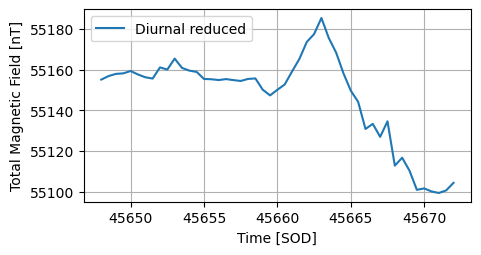

In [140]:
ref_value = np.interp(dat6_sorted.SOD, BS.SOD, BS.centered)
dat6_sorted["External"] = ref_value
dat6_sorted["Internal"] = dat6_sorted.nT - dat6_sorted.External
# dat4["diurnal_reduced"] = dat4.nT - dat4.Diff_BASE_meas

fig = plt.figure(figsize=(N, 0.5*N))
# plt.plot(dat4.SOD, dat4.nT, label="Measured")
plt.plot(dat6_sorted.SOD, dat6_sorted.Internal, label="Diurnal reduced")
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.legend()
plt.grid()
plt.show()

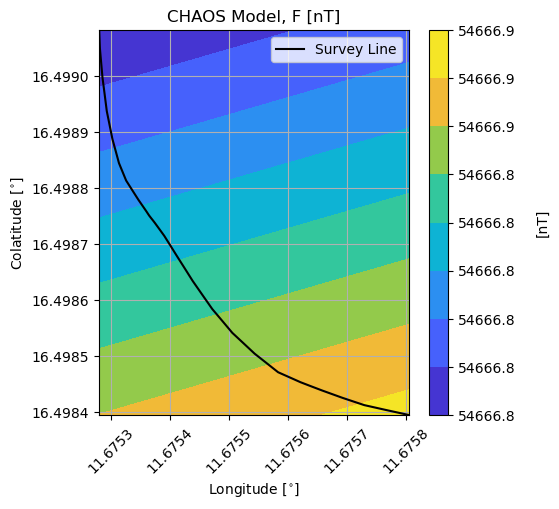

In [141]:
Chaos_path = Path("..", "Data", "CHAOS-7.10.mat")
date = "24/08-2018"
dat6_sorted["Lithospheric"] = Calc_CHAOS(Chaos_path, dat6_sorted, date)


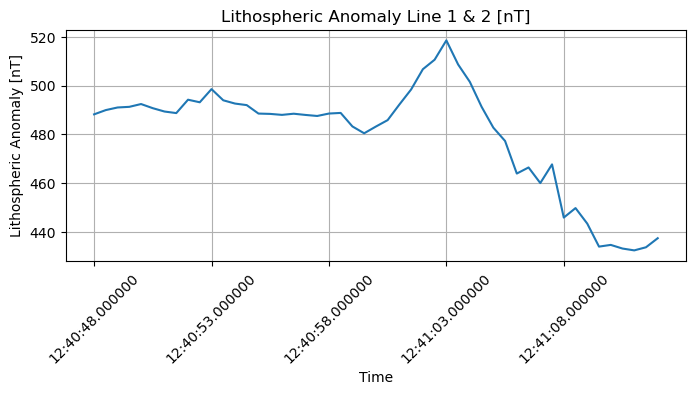

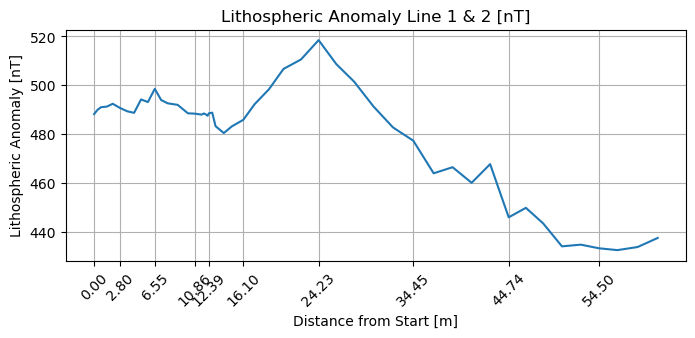

In [142]:
fig = plt.figure(figsize=(8,3))
plt.plot(dat6_sorted.Formatted_time, dat6_sorted.Lithospheric)
plt.grid()
plt.xlabel("Time")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Lithospheric Anomaly Line 1 & 2 [nT]")
plt.xticks(dat6_sorted.Formatted_time[::10], rotation = 45)

plt.show()

dat6_sorted["Dist"] = dist_from_ref(dat6_sorted.Easting, dat6_sorted.Easting[0], 
                                    dat6_sorted.Northing, dat6_sorted.Northing[0])
fig = plt.figure(figsize=(8,3))
plt.plot(dat6_sorted.Dist, dat6_sorted.Lithospheric)
plt.grid()
plt.xlabel("Distance from Start [m]")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Lithospheric Anomaly Line 1 & 2 [nT]")
plt.xticks(dat6_sorted.Dist[::5], rotation = 45)
plt.show()

## Line 7 (Helvetesdalen Third Area)

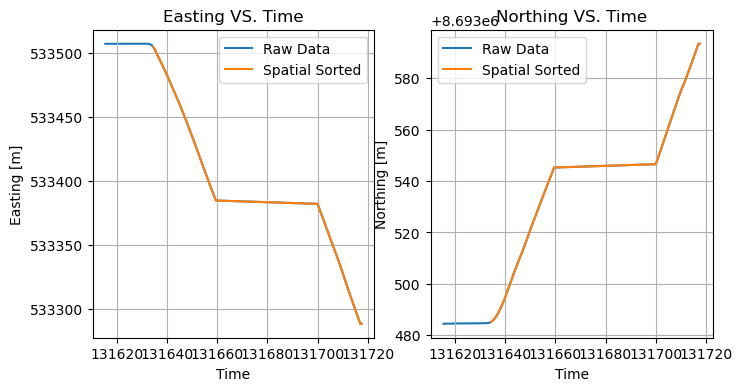

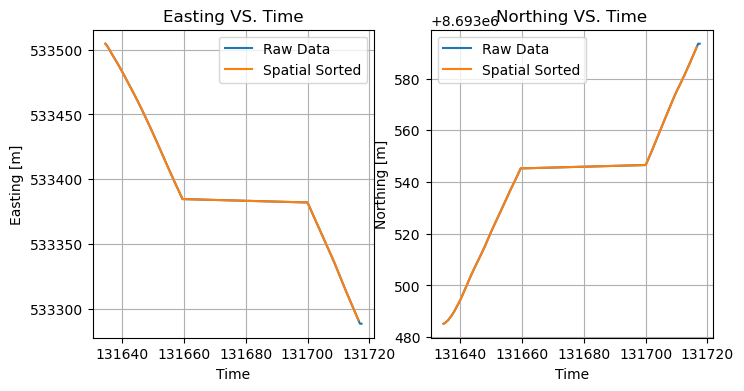

In [143]:
dat7_sorted = spatial_cut(dat7, 38, 0)
dat7_sorted = spatial_cut(dat7_sorted, 85, 1)

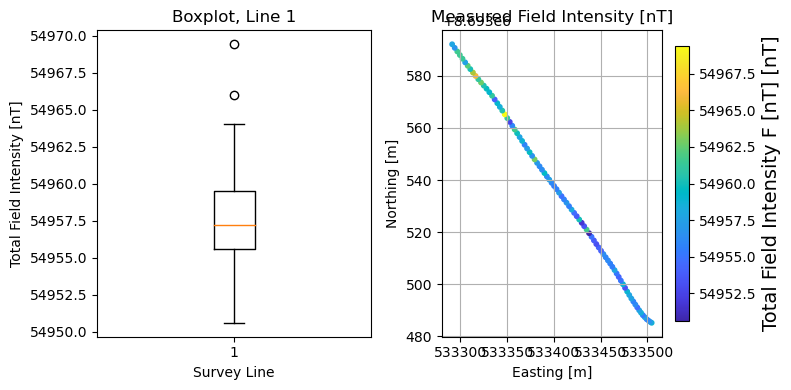

In [144]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first subplot
axs[0].boxplot(dat7_sorted.nT)
axs[0].set_title('Boxplot, Line 1')
axs[0].set_ylabel("Total Field Intensity [nT]")
axs[0].set_xlabel("Survey Line")


plt.grid()
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")

# Plot the second subplot
sc = axs[1].scatter(dat7_sorted.Easting, dat7_sorted.Northing, 10, c = dat7_sorted.nT, facecolors="None",cmap=parula_map)
axs[1].set_title('Measured Field Intensity [nT]')
cbar=fig.colorbar(sc, shrink=0.9)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=14)
cbar.set_alpha(1)
cbar.draw_all()
# sc.set_clim(55050, 55250)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


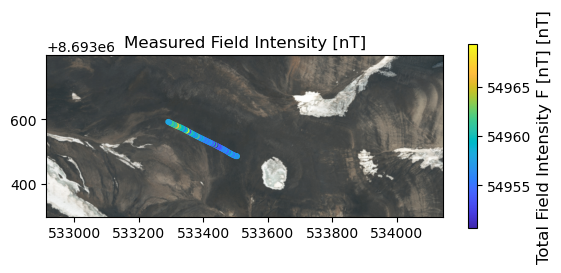

In [145]:
file = Path("..", "Data", "Tiff", "Line_7_even_closer", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)
sc = plt.scatter(dat7_sorted.Easting, dat7_sorted.Northing, 10, c = dat7_sorted.nT, facecolors="None",cmap=parula_map)
plt.title('Measured Field Intensity [nT]')
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()


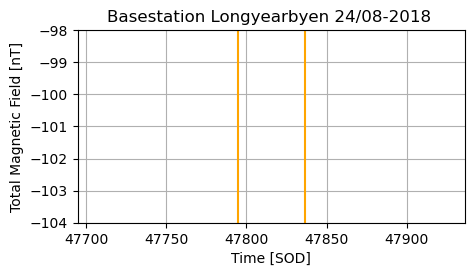

In [146]:
dat7_sorted["Formatted_time"] = time_convert(dat7_sorted.time, '24/08/2018')
dat7_sorted["SOD"] = get_sec(dat7_sorted.Formatted_time)

fig = plt.figure(figsize=(N, .5*N))
plt.plot(BS.SOD, BS.centered)
plt.grid()
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.title(r"Basestation Longyearbyen 24/08-2018 ")
plt.axvline(x = min(dat7_sorted.SOD), color = 'orange', label = 'axvline - full height')
plt.axvline(x = max(dat7_sorted.SOD), color = 'orange', label = 'axvline - full height')
plt.xlim(min(dat7_sorted.SOD)-100, max(dat7_sorted.SOD)+100)
plt.ylim(-104, -98)
plt.show()


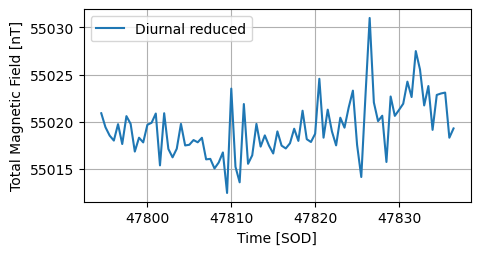

In [147]:
ref_value = np.interp(dat7_sorted.SOD, BS.SOD, BS.centered)
dat7_sorted["External"] = ref_value
dat7_sorted["Internal"] = dat7_sorted.nT - dat7_sorted.External
# dat4["diurnal_reduced"] = dat4.nT - dat4.Diff_BASE_meas

fig = plt.figure(figsize=(N, 0.5*N))
# plt.plot(dat4.SOD, dat4.nT, label="Measured")
plt.plot(dat7_sorted.SOD, dat7_sorted.Internal, label="Diurnal reduced")
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.legend()
plt.grid()
plt.show()

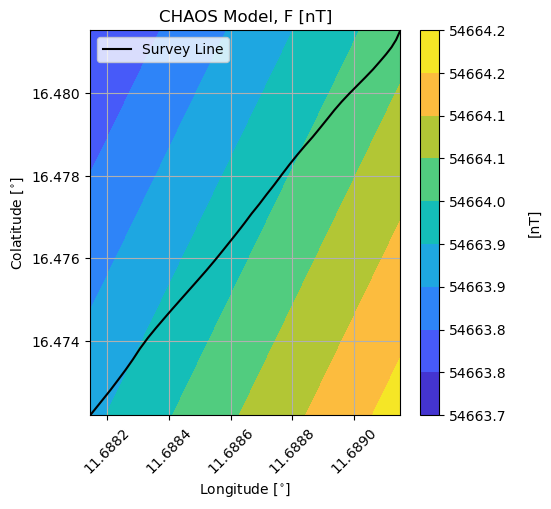

In [148]:

Chaos_path = Path("..", "Data", "CHAOS-7.10.mat")
date = "24/08-2018"
dat7_sorted["Lithospheric"] = Calc_CHAOS(Chaos_path, dat7_sorted, date)


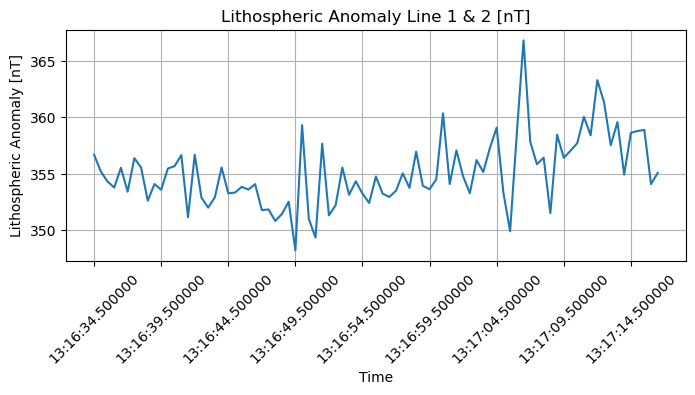

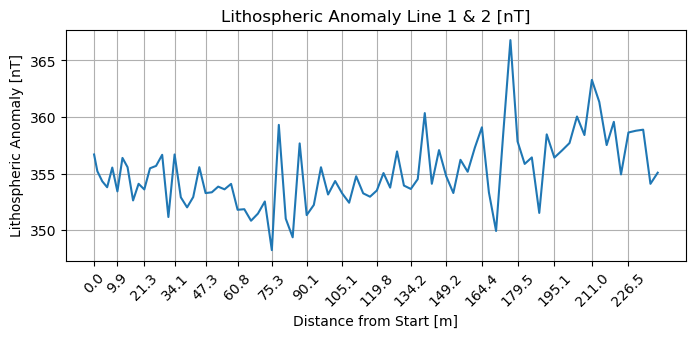

In [149]:
fig = plt.figure(figsize=(8,3))
plt.plot(dat7_sorted.Formatted_time, dat7_sorted.Lithospheric)
plt.grid()
plt.xlabel("Time")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Lithospheric Anomaly Line 1 & 2 [nT]")
plt.xticks(dat7_sorted.Formatted_time[::10], rotation = 45)

plt.show()

dat7_sorted["Dist"] = dist_from_ref(dat7_sorted.Easting, dat7_sorted.Easting[0], 
                                    dat7_sorted.Northing, dat7_sorted.Northing[0])
fig = plt.figure(figsize=(8,3))
plt.plot(dat7_sorted.Dist, dat7_sorted.Lithospheric)
plt.grid()
plt.xlabel("Distance from Start [m]")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Lithospheric Anomaly Line 1 & 2 [nT]")
plt.xticks(dat7_sorted.Dist[::5], rotation = 45)
plt.show()


## Line 8 (Helvetesdalen Line and Sixth area Dolerite)

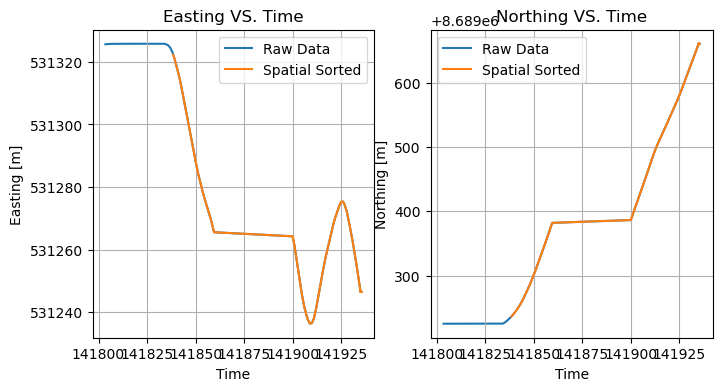

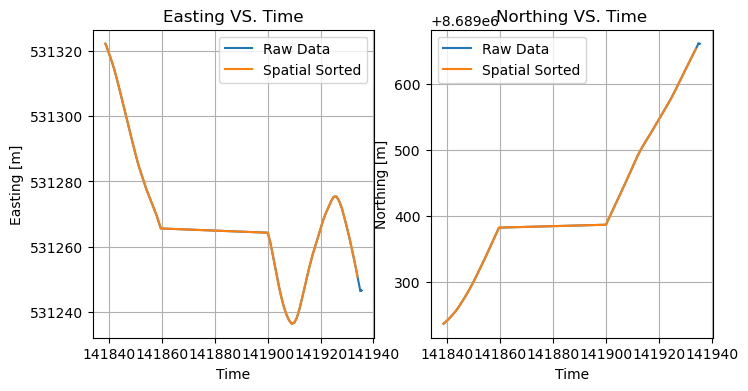

In [150]:
dat8_sorted = spatial_cut(dat8, 70, 0)
dat8_sorted = spatial_cut(dat8_sorted, 112, 1)

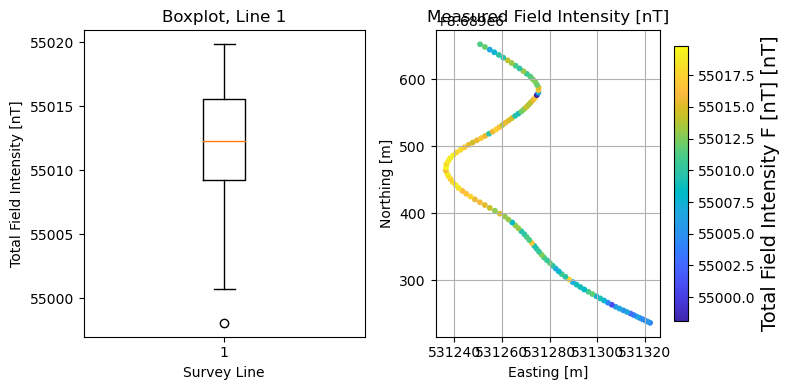

In [151]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first subplot
axs[0].boxplot(dat8_sorted.nT)
axs[0].set_title('Boxplot, Line 1')
axs[0].set_ylabel("Total Field Intensity [nT]")
axs[0].set_xlabel("Survey Line")


plt.grid()
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
# plt.colorbar(label="Measured Total Field [nT]")
# plt.set_cmap("jet")

# Plot the second subplot
sc = axs[1].scatter(dat8_sorted.Easting, dat8_sorted.Northing, 10, c = dat8_sorted.nT, facecolors="None",cmap=parula_map)
axs[1].set_title('Measured Field Intensity [nT]')
cbar=fig.colorbar(sc, shrink=0.9)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=14)
cbar.set_alpha(1)
cbar.draw_all()
# sc.set_clim(55050, 55250)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

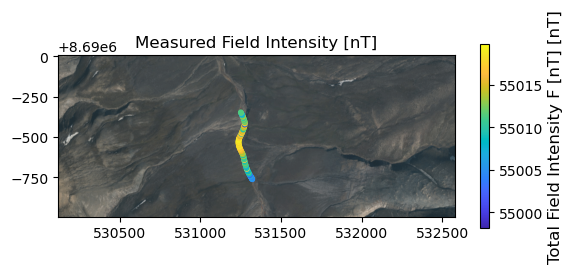

In [152]:
file = Path("..", "Data", "Tiff", "Line_8", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)
sc = plt.scatter(dat8_sorted.Easting, dat8_sorted.Northing, 10, c = dat8_sorted.nT, facecolors="None",cmap=parula_map)
plt.title('Measured Field Intensity [nT]')
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Total Field Intensity F [nT] [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()


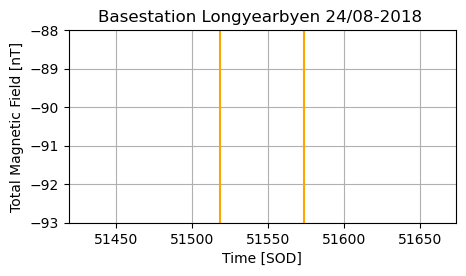

In [153]:
dat8_sorted["Formatted_time"] = time_convert(dat8_sorted.time, '24/08/2018')
dat8_sorted["SOD"] = get_sec(dat8_sorted.Formatted_time)

fig = plt.figure(figsize=(N, .5*N))
plt.plot(BS.SOD, BS.centered)
plt.grid()
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.title(r"Basestation Longyearbyen 24/08-2018 ")
plt.axvline(x = min(dat8_sorted.SOD), color = 'orange', label = 'axvline - full height')
plt.axvline(x = max(dat8_sorted.SOD), color = 'orange', label = 'axvline - full height')
plt.xlim(min(dat8_sorted.SOD)-100, max(dat8_sorted.SOD)+100)
plt.ylim(-93, -88)
plt.show()


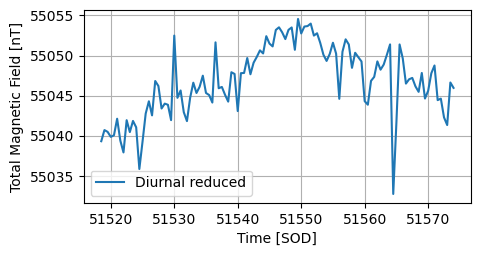

In [154]:

ref_value = np.interp(dat8_sorted.SOD, BS.SOD, BS.centered)
dat8_sorted["External"] = ref_value
dat8_sorted["Internal"] = dat8_sorted.nT - dat8_sorted.External
# dat4["diurnal_reduced"] = dat4.nT - dat4.Diff_BASE_meas

fig = plt.figure(figsize=(N, 0.5*N))
# plt.plot(dat4.SOD, dat4.nT, label="Measured")
plt.plot(dat8_sorted.SOD, dat8_sorted.Internal, label="Diurnal reduced")
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.legend()
plt.grid()
plt.show()


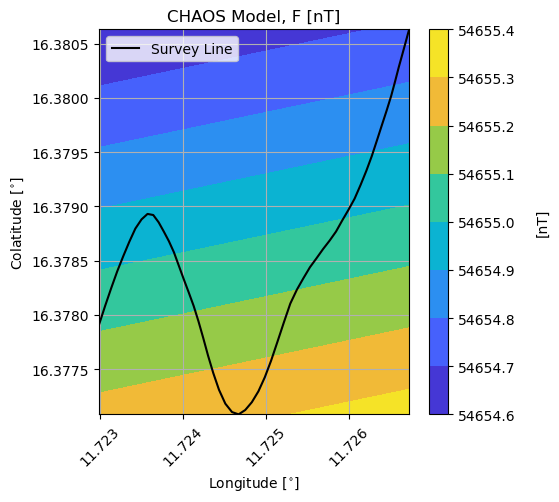

In [155]:

Chaos_path = Path("..", "Data", "CHAOS-7.10.mat")
date = "24/08-2018"
dat8_sorted["Lithospheric"] = Calc_CHAOS(Chaos_path, dat8_sorted, date)

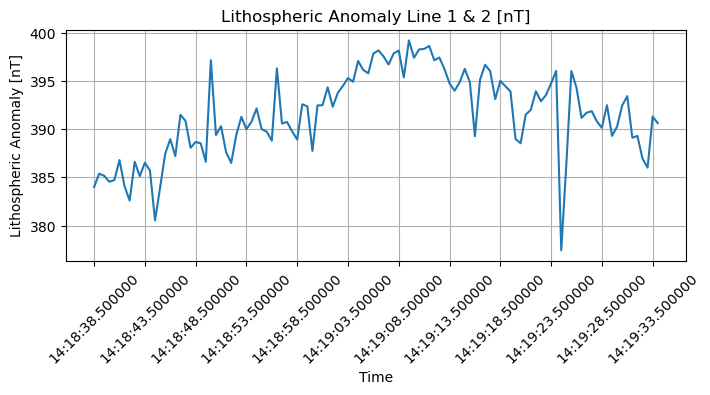

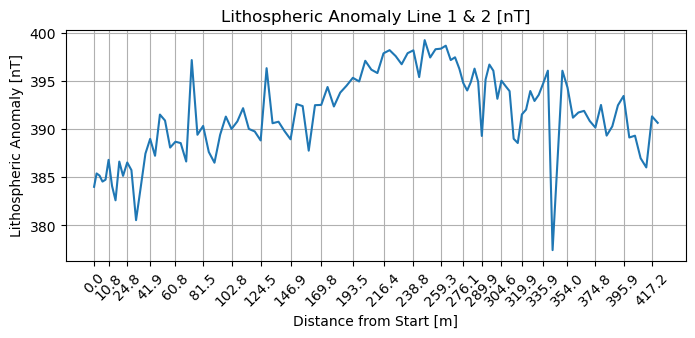

In [156]:
fig = plt.figure(figsize=(8,3))
plt.plot(dat8_sorted.Formatted_time, dat8_sorted.Lithospheric)
plt.grid()
plt.xlabel("Time")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Lithospheric Anomaly Line 1 & 2 [nT]")
plt.xticks(dat8_sorted.Formatted_time[::10], rotation = 45)

plt.show()

dat8_sorted["Dist"] = dist_from_ref(dat8_sorted.Easting, dat8_sorted.Easting[0], 
                                    dat8_sorted.Northing, dat8_sorted.Northing[0])
fig = plt.figure(figsize=(8,3))
plt.plot(dat8_sorted.Dist, dat8_sorted.Lithospheric)
plt.grid()
plt.xlabel("Distance from Start [m]")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Lithospheric Anomaly Line 1 & 2 [nT]")
plt.xticks(dat8_sorted.Dist[::5], rotation = 45)
plt.show()


## Magneticvalues profile 1 & 2 

In [157]:
file1 = Path("..", "Data", "Magnetic_data", "Magneticvalues_profile_2.xlsx")
prof2 = pd.read_excel(file1, sheet_name="Blad 1", header=0, names=["lat", "lon", 
                                                                "nT_meas", "base_nT", 
                                                                "diff_nT", "mu", "nT_corr", 
                                                                "IFRF13", "ano_nT"])

file1 = Path("..", "Data", "Magnetic_data", "Magneticvalues_profile_1.xlsx")
prof1 = pd.read_excel(file1, sheet_name="Blad1", header=0, names=["lon", "lat", 
                                                                "nT_meas", "base_nT", 
                                                                "diff_nT", "mu", "nT_corr", 
                                                                "IFRF13", "ano_nT"])

In [160]:
import UNIS_src as src
UTM = src.ll2utm(prof1.lon, prof1.lat, np.ones(len(prof1.lon)), utmZone)
prof1["Northing"] = UTM.Northing
prof1["Easting"] = UTM.Easting
prof1["UTM_elevation"] = UTM.Elevation

UTM = src.ll2utm(prof2.lon, prof2.lat, np.ones(len(prof2.lon)), utmZone)
prof2["Northing"] = UTM.Northing
prof2["Easting"] = UTM.Easting
prof2["UTM_elevation"] = UTM.Elevation


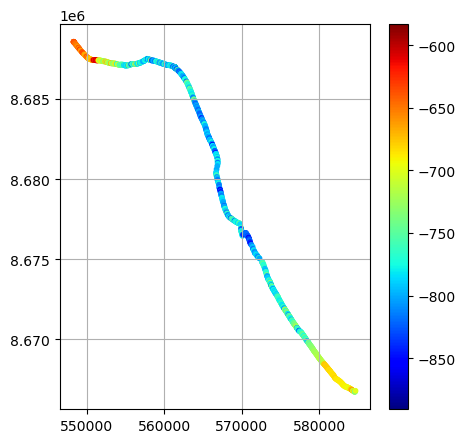

In [161]:
idx = (prof2.Northing > 8.690e6)
prof2_sorted = prof2.drop(prof2.index[idx])
prof2_sorted.reset_index(drop=True, inplace=True)

fig = plt.figure(figsize=(5,5))
# plt.scatter(prof1.Easting, prof1.Northing, 10, prof1.ano_nT)
plt.scatter(prof2_sorted.Easting, prof2_sorted.Northing, 10, prof2_sorted.ano_nT)
plt.grid()
plt.colorbar()
plt.show()


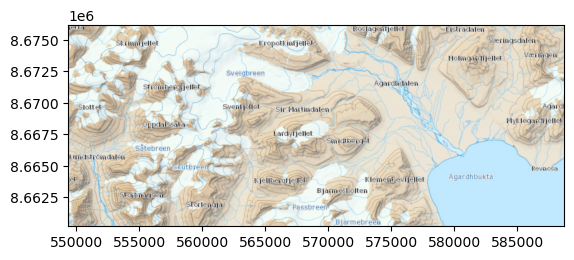

In [163]:
file = Path("..", "Data", "Tiff", "test1", "Export.tif")
file2 = Path("..", "Data", "Tiff", "test2", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)
# rgb_image, extent = Import_tiff(file2)

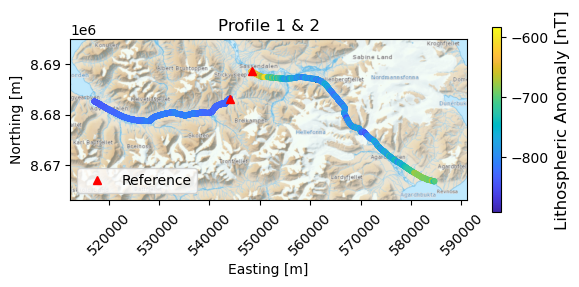

In [164]:

file = Path("..", "Data", "Tiff", "prof_12", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)
sc = plt.scatter(prof2_sorted.Easting, prof2_sorted.Northing, 10, c = prof2_sorted.ano_nT, facecolors="None",cmap=parula_map)
plt.scatter(prof1.Easting, prof1.Northing, 10, c = prof1.ano_nT, facecolors="None",cmap=parula_map)
plt.title('Profile 1 & 2')
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Lithospheric Anomaly [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()
plt.xticks(rotation = 45)
plt.plot(prof1.Easting[0], prof1.Northing[0], 'r^')
plt.plot(prof2_sorted.Easting[0], prof2_sorted.Northing[0], 'r^', label="Reference")
plt.legend(loc="lower left")
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
output_file = Path("..", "Figures", "Profile_12.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

plt.show()

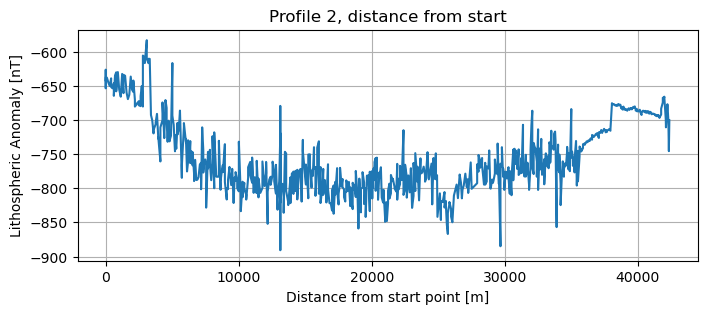

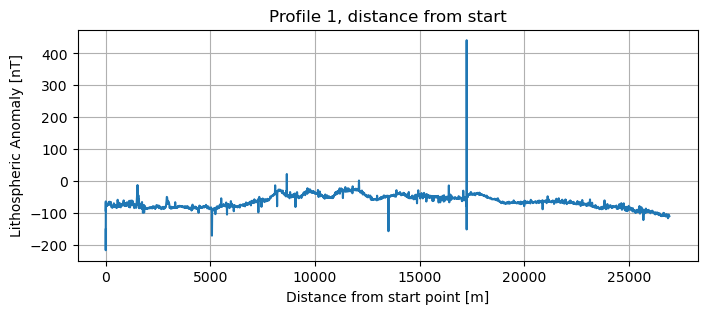

In [165]:
prof2_sorted["dist"] = dist_from_ref(prof2_sorted.Easting, prof2_sorted.Easting[0], 
                                     prof2_sorted.Northing, prof2_sorted.Northing[0])
prof1["dist"] = dist_from_ref(prof1.Easting, prof1.Easting[0], 
                                     prof1.Northing, prof1.Northing[0])
fig = plt.figure(figsize=(8,3))
plt.plot(prof2_sorted.dist, prof2_sorted.ano_nT)
plt.grid()
plt.xlabel("Distance from start point [m]")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Profile 2, distance from start")
plt.show()

fig = plt.figure(figsize=(8,3))
plt.plot(prof1.dist, prof1.ano_nT)
plt.grid()
plt.xlabel("Distance from start point [m]")
plt.ylabel("Lithospheric Anomaly [nT]")
plt.title("Profile 1, distance from start")
# plt.xlim(17240, 17260)
plt.show()



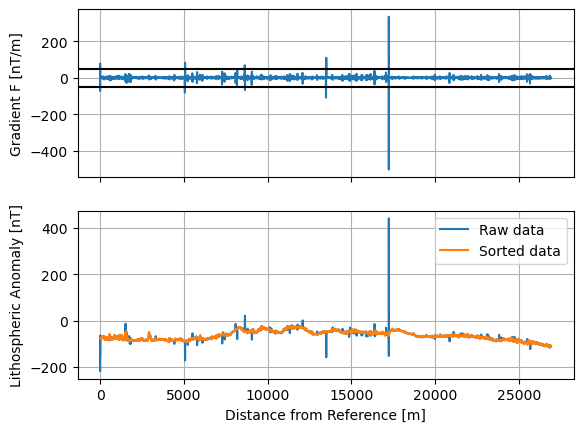

In [166]:
s1 = pd.Series(prof1.ano_nT.values[-1])
gradient = np.diff(prof1.ano_nT.append(s1))

idx = np.logical_or(gradient > 10, gradient < -10)
prof1_sorted = prof1.drop(prof1.index[idx])
prof1_sorted.reset_index(drop=True, inplace=True)

idx = np.logical_and(prof1_sorted.dist > 17242.5, prof1_sorted.dist < 17250)
prof1_sorted = prof1_sorted.drop(prof1_sorted.index[idx])
prof1_sorted.reset_index(drop=True, inplace=True)

idx = np.logical_and(prof1_sorted.dist >= 0, prof1_sorted.dist < 20)
prof1_sorted = prof1_sorted.drop(prof1_sorted.index[idx])
prof1_sorted.reset_index(drop=True, inplace=True)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(prof1.dist, gradient)
ax1.axhline(50, color="black")
ax1.axhline(-50, color="black")
ax1.set_ylabel("Gradient F [nT/m]")
ax1.grid()

ax2.plot(prof1.dist, prof1.ano_nT, label="Raw data")
ax2.plot(prof1_sorted.dist, prof1_sorted.ano_nT, label="Sorted data")
ax2.legend()
ax2.grid()
ax2.set_ylabel("Lithospheric Anomaly [nT]")
ax2.set_xlabel("Distance from Reference [m]")

plt.show()



In [253]:
idx1 = np.logical_and(prof1_sorted.dist > 7600, prof1_sorted.dist < 8800)
idx2 = np.logical_and(prof1_sorted.dist > 9400, prof1_sorted.dist < 10600)
idx3 = np.logical_and(prof1_sorted.dist > 10800, prof1_sorted.dist < 13000)
idx4 = np.logical_and(prof1_sorted.dist > 17000, prof1_sorted.dist < 19000)

list_idx = [idx1, idx2, idx3, idx4]
len(list_idx)

4

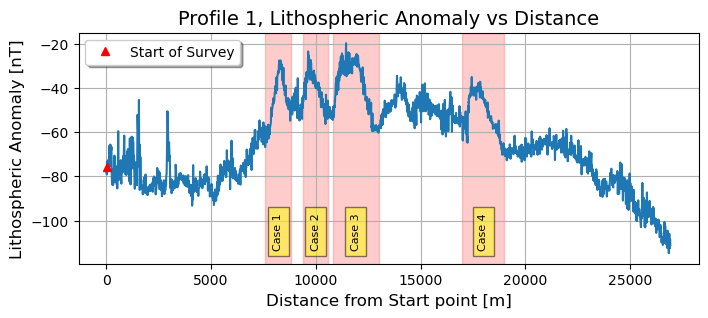

In [294]:
fig = plt.figure(figsize=(8,3))
plt.plot(prof1_sorted.dist, prof1_sorted.ano_nT)
plt.plot(prof1_sorted.dist[0], prof1_sorted.ano_nT[0], 'r^', label="Start of Survey")
plt.grid()
plt.title('Profile 1, Lithospheric Anomaly vs Distance', fontsize=14)
plt.xlabel("Distance from Start point [m]", fontsize=12)
plt.ylabel("Lithospheric Anomaly [nT]", fontsize=12)
plt.legend(loc='upper left', fancybox=True, shadow=True)
plt.axvspan(7600, 8800, alpha=0.2, color='red')
plt.axvspan(9400, 10600, alpha=0.2, color='red')
plt.axvspan(10800, 13000, alpha=0.2, color='red')
plt.axvspan(17000, 19000, alpha=0.2, color='red')
plt.text((7600+8800)/2, -105, s=r"Case 1", ha='center', va='center', fontdict=dict(color="black",size=8), 
         bbox=dict(facecolor="yellow",alpha=0.5), rotation=90)
plt.text((9400+10600)/2, -105, s=r"Case 2", ha='center', va='center', fontdict=dict(color="black",size=8), 
         bbox=dict(facecolor="yellow",alpha=0.5), rotation=90)
plt.text((10800+13000)/2, -105, s=r"Case 3", ha='center', va='center', fontdict=dict(color="black",size=8), 
         bbox=dict(facecolor="yellow",alpha=0.5), rotation=90)
plt.text((17000+19000)/2, -105, s=r"Case 4", ha='center', va='center', fontdict=dict(color="black",size=8), 
         bbox=dict(facecolor="yellow",alpha=0.5), rotation=90)
output_file = Path("..", "Figures", "Profile_1_geo_area.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


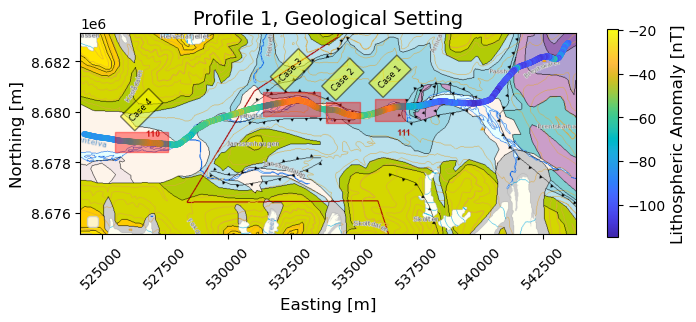

In [303]:
file = Path("..", "Data", "Tiff", "GEO_PROF_1_closer", "Export.tif")
fig, ax = plt.subplots(figsize=(8,3))
rgb_image, extent = Import_tiff(file)
A = 80
B = 1835
case = ["Case 1", "Case 2", "Case 3", "Case 4"]
# sc = plt.scatter(prof2_sorted.Easting, prof2_sorted.Northing, 10, c = prof2_sorted.ano_nT, facecolors="None",cmap=parula_map)
plt.scatter(prof1_sorted.Easting[A:B], prof1_sorted.Northing[A:B], 10, c = prof1_sorted.ano_nT[A:B], facecolors="None",cmap=parula_map)
for i in range(len(list_idx)): 
    x_min, x_max = min(prof1_sorted.Easting[list_idx[i]]), max(prof1_sorted.Easting[list_idx[i]])
    y_min, y_max = min(prof1_sorted.Northing[list_idx[i]]), max(prof1_sorted.Northing[list_idx[i]])

    plt.gca().add_patch(plt.Rectangle((x_min, y_min-300), x_max - x_min, (y_max+300) - (y_min-300), 
                                      fill=True, edgecolor='red', facecolor="red", linewidth=1, alpha=0.4))
    plt.text((x_min+x_max)/2, y_max+1200, s=case[i], ha='center', va='center', fontdict=dict(color="black",size=6), 
             bbox=dict(facecolor="yellow",alpha=0.5), rotation=45)
plt.ticklabel_format(style="sci")

plt.title('Profile 1, Geological Setting', fontsize=14)
cbar=fig.colorbar(sc, shrink=0.9)
cbar.set_label('Lithospheric Anomaly [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()
plt.xticks(rotation = 45)
# plt.plot(prof1_sorted.Easting[0], prof1_sorted.Northing[0], 'r^')
plt.legend(loc="lower left")
plt.xlabel("Easting [m]", fontsize=12)
plt.ylabel("Northing [m]", fontsize=12)
output_file = Path("..", "Figures", "Profile_1_ceo_closer.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


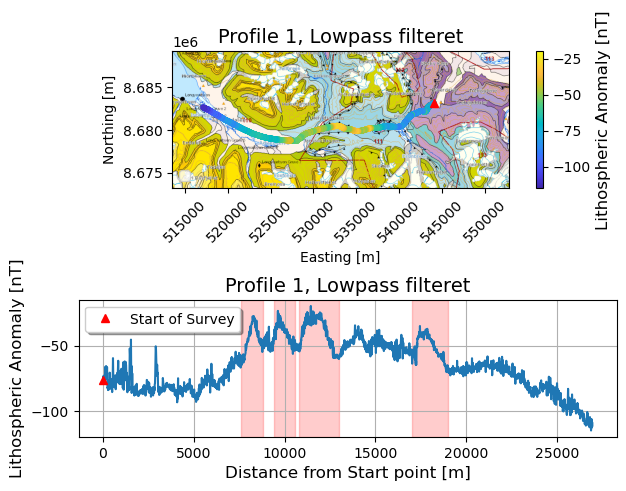

In [268]:
file = Path("..", "Data", "Tiff", "GEO_PROF_1", "Export.tif")
fig, ax = plt.subplots(2)
rgb_image, extent = src.Import_tiff(file, ax[0])
sc = ax[0].scatter(prof1_sorted.Easting, prof1_sorted.Northing, 10, c = prof1_sorted.ano_nT, facecolors="None",cmap=parula_map)
ax[0].set_title('Profile 1, Lowpass filteret', fontsize=14)
cbar = fig.colorbar(sc, ax = ax[0])
cbar.set_label('Lithospheric Anomaly [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()

ax[0].plot(prof1_sorted.Easting[0], prof1_sorted.Northing[0], 'r^')
ax[0].legend(loc="lower left")
ax[0].set_xlabel("Easting [m]")
ax[0].set_ylabel("Northing [m]")
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)

ax[1].plot(prof1_sorted.dist, prof1_sorted.ano_nT)
ax[1].plot(prof1_sorted.dist[0], prof1_sorted.ano_nT[0], 'r^', label="Start of Survey")
ax[1].grid()
ax[1].set_title('Profile 1, Lowpass filteret', fontsize=14)
ax[1].set_xlabel("Distance from Start point [m]", fontsize=12)
ax[1].set_ylabel("Lithospheric Anomaly [nT]", fontsize=12)
ax[1].legend(loc='upper left', fancybox=True, shadow=True)
ax[1].axvspan(7600, 8800, alpha=0.2, color='red')
ax[1].axvspan(9400, 10600, alpha=0.2, color='red')
ax[1].axvspan(10800, 13000, alpha=0.2, color='red')
ax[1].axvspan(17000, 19000, alpha=0.2, color='red')

fig.tight_layout()
output_file = Path("..", "Figures", "Profile_1_geo.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


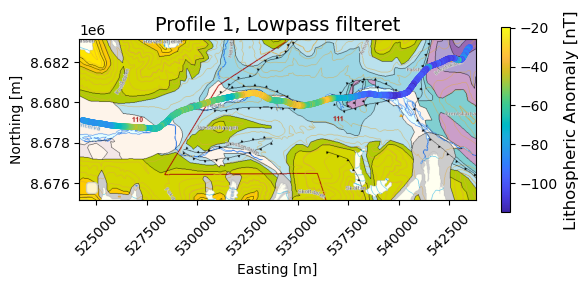

In [224]:
file = Path("..", "Data", "Tiff", "GEO_PROF_1_closer", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)
A = 80
B = 1835
# sc = plt.scatter(prof2_sorted.Easting, prof2_sorted.Northing, 10, c = prof2_sorted.ano_nT, facecolors="None",cmap=parula_map)
plt.scatter(prof1_sorted.Easting[A:B], prof1_sorted.Northing[A:B], 10, c = prof1_sorted.ano_nT[A:B], facecolors="None",cmap=parula_map)
plt.title('Profile 1, Lowpass filteret', fontsize=14)
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Lithospheric Anomaly [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()
plt.xticks(rotation = 45)
# plt.plot(prof1_sorted.Easting[0], prof1_sorted.Northing[0], 'r^')
plt.legend(loc="lower left")
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
output_file = Path("..", "Figures", "Profile_1_ceo_closer.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


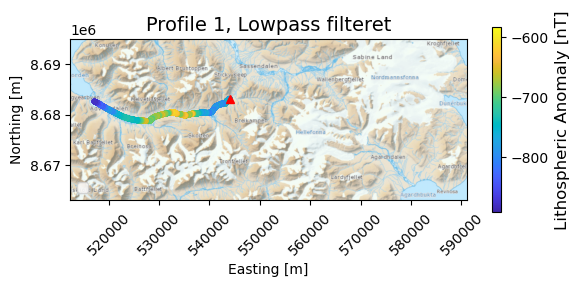

In [168]:
file = Path("..", "Data", "Tiff", "prof_12", "Export.tif")
fig, ax = axs = plt.subplots()
rgb_image, extent = Import_tiff(file)
# sc = plt.scatter(prof2_sorted.Easting, prof2_sorted.Northing, 10, c = prof2_sorted.ano_nT, facecolors="None",cmap=parula_map)
plt.scatter(prof1_sorted.Easting, prof1_sorted.Northing, 10, c = prof1_sorted.ano_nT, facecolors="None",cmap=parula_map)
plt.title('Profile 1, Lowpass filteret', fontsize=14)
cbar=fig.colorbar(sc, shrink=0.5)
cbar.set_label('Lithospheric Anomaly [nT]',fontsize=12)
cbar.set_alpha(1)
cbar.draw_all()
plt.xticks(rotation = 45)
plt.plot(prof1_sorted.Easting[0], prof1_sorted.Northing[0], 'r^')
# plt.plot(prof2_sorted.Easting[0], prof2_sorted.Northing[0], 'r^', label="Reference")
plt.legend(loc="lower left")
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
# plt.xlim(prof1_sorted.Easting[0]-100, prof1_sorted.Easting[2403]+100)
output_file = Path("..", "Figures", "Profile_12.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

plt.show()




## Good damn Forward Modelling...

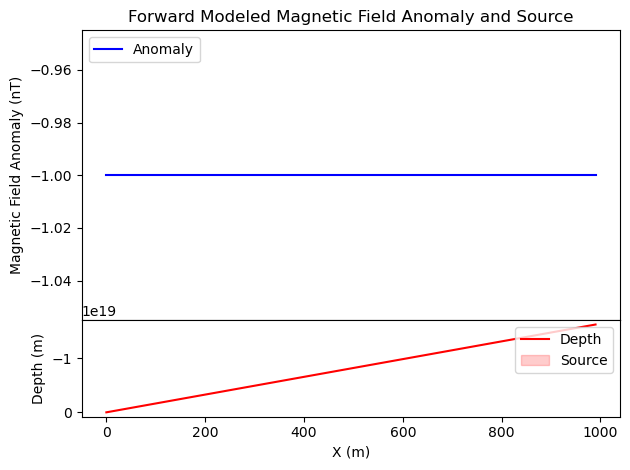

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define model parameters
num_points = 100  # Number of observation points
spacing = 10  # Spacing between observation points in meters

# Create observation points along a line
x = np.arange(0, num_points) * spacing

# Define source parameters
source_width = 2.0  # Width of the magnetic source column in meters
source_inclination = np.radians(90)  # Angle of inclination of the source in radians
background_susceptibility = 1.0  # Background magnetic susceptibility (non-magnetic)
contrasting_susceptibility = 2.0  # Susceptibility contrast for the magnetic source
source_moment = 1000  # Magnetic dipole moment in A.m²

# Calculate magnetic field at each observation point based on susceptibility contrast, source width, inclination, and dipole moment
magnetic_field = np.zeros_like(x)

for i, obs_point in enumerate(x):
    # Calculate distance between observation point and source
    distance = np.abs(obs_point - np.mean(x))

    # Calculate the magnetic field at the observation point
    magnetic_field[i] = (
        (3 * contrasting_susceptibility * source_moment * np.cos(source_inclination) * (distance ** 2)) /
        (4 * np.pi * (distance ** 5))
    )

# Calculate the background field (uniform magnetic field)
background_field = np.ones_like(x) * background_susceptibility

# Calculate the total field anomaly (difference between the magnetic field and background field)
anomaly = magnetic_field - background_field

# Create subplots for anomaly and source representation
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace': 0, 'height_ratios': [3, 1]})

# Plot the magnetic field anomaly in the first subplot
ax1.plot(x, anomaly, 'b-', label='Anomaly')
ax1.set_ylabel('Magnetic Field Anomaly (nT)')
ax1.set_title('Forward Modeled Magnetic Field Anomaly and Source')

# Calculate the depth based on the inclination angle and x-coordinate
depth = -np.tan(source_inclination) * x

# Plot the depth in the second subplot
ax2.plot(x, depth, 'r-', label='Depth')
ax2.set_xlabel('X (m)')
ax2.set_ylabel('Depth (m)')
ax2.invert_yaxis()

# Add a representation of the source as a rotated rectangle in the second subplot
source_center = np.mean(x)
source_height = max(depth)
source_top = 0  # y-coordinate of the top of the source rectangle
source_rect = patches.Rectangle(
    (source_center - source_width / 2, source_top - source_height),
    source_width,
    source_height,
    angle=np.degrees(source_inclination),
    edgecolor='red',
    facecolor='red',
    alpha=0.2,
    label='Source'
)
ax2.add_patch(source_rect)

# Adjust plot layout and add legend
plt.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()


## BaseStation plot for Presentation 

In [171]:
def load_BS(file_path): 
    BS = pd.read_csv(file_path, delimiter="\s+", header=0, skiprows=6, 
                 names=["date", "time", "Dec", "Horiz", "Vert", "Incl", "Total"])
    # BS["Formatted_time"] = time_convert(BS.time, date_str)
    BS["SOD"] = get_sec(BS.time)

    BS = BS[BS.Total != max(BS.Total)]
    BS.reset_index(drop=True, inplace=True)
    BS["centered"] = BS.Total - np.mean(BS.Total)
    return BS

BS1_path = Path("..", "Data", "BS_LYER", "BS_LYER_01052022.txt")
BS2_path = Path("..", "Data", "BS_LYER", "BS_LYER_02052022.txt")
BS3_path = Path("..", "Data", "BS_LYER", "BS_LYER_03052022.txt")
BS4_path = Path("..", "Data", "BS_LYER", "BS_LYER_04052022.txt")
BS5_path = Path("..", "Data", "BS_LYER", "BS_LYER_05052022.txt")

BS1 = load_BS(BS1_path)
BS2 = load_BS(BS2_path)
BS3 = load_BS(BS3_path)
BS4 = load_BS(BS4_path)
BS5 = load_BS(BS5_path)



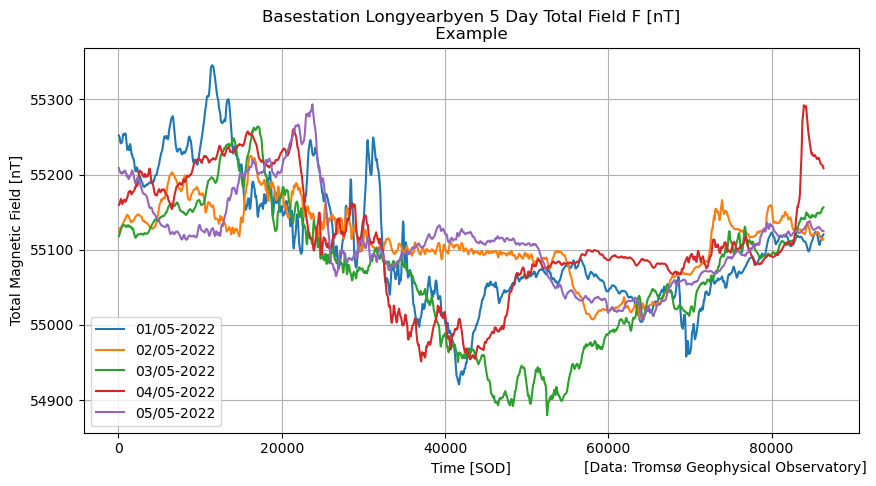

In [172]:
fig = plt.figure(figsize=(2*N, N))
plt.plot(BS1.SOD, BS1.Total, label="01/05-2022")
plt.plot(BS2.SOD, BS2.Total, label="02/05-2022")
plt.plot(BS3.SOD, BS3.Total, label="03/05-2022")
plt.plot(BS4.SOD, BS4.Total, label="04/05-2022")
plt.plot(BS5.SOD, BS5.Total, label="05/05-2022")

plt.grid()
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.title("Basestation Longyearbyen 5 Day Total Field F [nT]\n Example ")
plt.legend(loc="lower left")
plt.annotate('[Data: Tromsø Geophysical Observatory]', (0,0), (360,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')

output_file = Path("..", "Figures", "BS_Example.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

plt.show()

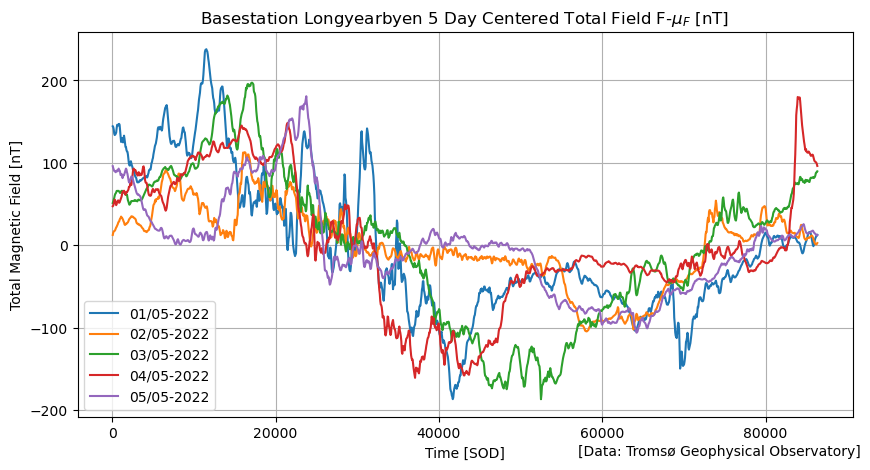

In [173]:
fig = plt.figure(figsize=(2*N, N))
plt.plot(BS1.SOD, BS1.centered, label="01/05-2022")
plt.plot(BS2.SOD, BS2.centered, label="02/05-2022")
plt.plot(BS3.SOD, BS3.centered, label="03/05-2022")
plt.plot(BS4.SOD, BS4.centered, label="04/05-2022")
plt.plot(BS5.SOD, BS5.centered, label="05/05-2022")

plt.grid()
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.title(r"Basestation Longyearbyen 5 Day Centered Total Field F-$\mu_F$ [nT]")
plt.legend(loc="lower left")
plt.annotate('[Data: Tromsø Geophysical Observatory]', (0,0), (360,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')

output_file = Path("..", "Figures", "BS_Example.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

plt.show()


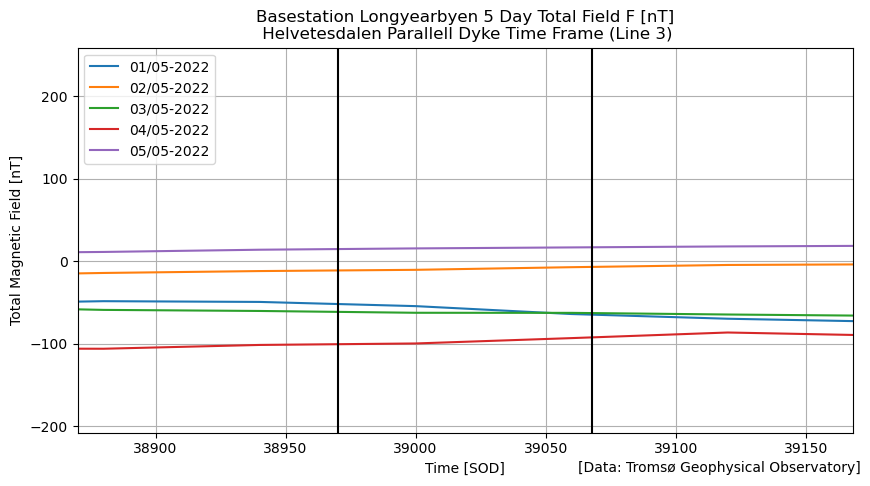

In [174]:
fig = plt.figure(figsize=(2*N, N))
plt.plot(BS1.SOD, BS1.centered, label="01/05-2022")
plt.plot(BS2.SOD, BS2.centered, label="02/05-2022")
plt.plot(BS3.SOD, BS3.centered, label="03/05-2022")
plt.plot(BS4.SOD, BS4.centered, label="04/05-2022")
plt.plot(BS5.SOD, BS5.centered, label="05/05-2022")

plt.grid()
plt.xlabel("Time [SOD]")
plt.ylabel("Total Magnetic Field [nT]")
plt.title("Basestation Longyearbyen 5 Day Total Field F [nT]\n Helvetesdalen Parallell Dyke Time Frame (Line 3)")
plt.legend(loc="upper left")

plt.axvline(x = min(dat3_sorted.SOD), color = 'black', label = 'axvline - full height')
plt.axvline(x = max(dat3_sorted.SOD), color = 'black', label = 'axvline - full height')

plt.xlim(min(dat3_sorted.SOD)-100, max(dat3_sorted.SOD)+100)
plt.annotate('[Data: Tromsø Geophysical Observatory]', (0,0), (360,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top')

output_file = Path("..", "Figures", "BS_Example_1.pdf")
plt.savefig(output_file, format="pdf", bbox_inches="tight")

plt.show()



In [175]:
x1 = min(dat3_sorted.SOD)
x2 = max(dat3_sorted.SOD)
idx = np.logical_and(BS1.SOD > x1, BS1.SOD < x2)


In [176]:

print(np.var(BS1.centered[idx]))
print(np.var(BS2.centered[idx]))
print(np.var(BS3.centered[idx]))
print(np.var(BS4.centered[idx]))
print(np.var(BS5.centered[idx]))

23.039999999993015
2.5599999999953433
1.0
0.8100000000026193
0.36000000000261934
